# [Applied Statistics](https://lamastex.github.io/scalable-data-science/as/2019/)
## 1MS926, Spring 2019, Uppsala University 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 10. Convergence of Limits of Random Variables, Confidence Set Estimation and Testing


# Inference and Estimation: The Big Picture

- Limits
  - Limits of Sequences of Real Numbers
  - Limits of Functions
  - Limit of a Sequence of Random Variables
- Convergence in Distribution
- Convergence in Probability
- Some Basic Limit Laws in Statistics
- Weak Law of Large Numbers
- Central Limit Theorem 
- Asymptotic Normality of the Maximum Likelihood Estimator
- Set Estimators - Confidence Intervals and Sets from Maximum Likelihood Estimators
- Parametric Hypothesis Test - From Confidence Interval to Wald test
  

### Inference and Estimation: The Big Picture

The Models and their maximum likelihood estimators we discussed earlier fit into our Big Picture, which is about inference and estimation and especially inference and estimation problems where computational techniques are helpful. 

<table border="1" cellspacing="2" cellpadding="2" align="center">
<tbody>
<tr>
<td style="background-color: #ccccff;" align="center">&nbsp;</td>
<td style="background-color: #ccccff;" align="center"><strong>Point estimation</strong></td>
<td style="background-color: #ccccff;" align="center"><strong>Set estimation</strong></td>
<td style="background-color: #ccccff;" align="center"><strong>Hypothesis Testing</strong></td>
</tr>
<tr>
<td style="background-color: #ccccff;">
<p><strong>Parametric</strong></p>
<p>&nbsp;</p>
</td>
<td style="background-color: #ccccff;" align="center">
<p>MLE of finitely many parameters<br /><span style="color: #3366ff;"><em>done</em></span></p>
</td>
<td style="background-color: #ccccff;" align="center">
<p>Asymptotically Normal Confidence Intervals<br /><span style="color: #3366ff;"><em>about to see ...</em></span></p>
</td>
<td style="background-color: #ccccff;" align="center">
<p>Wald Test from Confidence Interval<br /><span style="color: #3366ff;"><em>about to see ...</em></span></p>
</td>
</tr>
<tr>
<td style="background-color: #ccccff;">
<p><strong>Non-parametric</strong><br /> (infinite-dimensional parameter space)</p>
</td>
<td style="background-color: #ccccff;" align="center"><strong><em><span style="color: #3366ff;">coming up ... </span></em></strong></td>
<td style="background-color: #ccccff;" align="center"><strong><em><span style="color: #3366ff;">coming up ... </span></em></strong></td>
<td style="background-color: #ccccff;" align="center"><strong><em><span style="color: #3366ff;">coming up ... </span></em></strong></td>
</td>
</tr>
</tbody>
</table>

But before we move on we have to discuss what makes it all work: the idea of limits - where do you get to if you just keep going?

## Limits

We talked about the likelihood function and maximum likelihood estimators for making point estimates of model parameters.  For example for the $Bernoulli(\theta^*)$ RV (a $Bernoulli$ RV with true but possibly unknown parameter $\theta^*$, we found that the likelihood function was $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$ where $t_n = \displaystyle\sum_{i=1}^n x_i$.  We also found the maxmimum likelihood estimator (MLE) for the $Bernoulli$ model, $\widehat{\theta}_n = \frac{1}{n}\displaystyle\sum_{i=1}^n x_i$. 

We demonstrated these ideas using samples simulated from a $Bernoulli$ process with a secret $\theta^*$.  We had an interactive plot of the likelihood function where we could increase $n$, the number of simulated samples or the amount of data we had to base our estimate on, and see the effect on the shape of the likelihood function.  The animation belows shows the changing likelihood function for the Bernoulli process with unknown $\theta^*$ as $n$  (the amount of data) increases.


<table style="width:100%">
  <tr>
    <th>Likelihood function for Bernoulli process, as $n$ goes from 1 to 1000 in a continuous loop.</th>
  </tr>
<tr>
    <th><img src="images/bernoulliLikelihoodAnim.gif" width=300></th>
  </tr>
</table>

For large $n$, you can probably make your own guess about the true value of $\theta^*$ even without knowing $t_n$.  As the animation progresses, we can see the likelihood function 'homing in' on $\theta = 0.3$. 

We can see this in another way, by just looking at the sample mean as $n$ increases.  An easy way to do this is with running means:  generate a very large sample and then calculate the mean first over just the first observation in the sample, then the first two, first three, etc etc (running means were discussed in an earlier worksheet if you want to go back and review them in detail in your own time).  Here we just define a function so that we can easily generate sequences of running means for our $Bernoulli$ process with the unknown $\theta^*$.

#### Preparation: Let's just evaluate the next cel and focus on concepts.

You can see what they are as you need to.

In [36]:
def likelihoodBernoulli(theta, n, tStatistic):
    '''Bernoulli likelihood function.
    theta in [0,1] is the theta to evaluate the likelihood at.
    n is the number of observations.
    tStatistic is the sum of the n Bernoulli observations.
    return a value for the likelihood of theta given the n observations and tStatistic.'''
    retValue = 0 # default return value
    if (theta >= 0 and theta <= 1): # check on theta
        mpfrTheta = RR(theta) # make sure we use a Sage mpfr 
        retValue = (mpfrTheta^tStatistic)*(1-mpfrTheta)^(n-tStatistic)
    return retValue
    
def bernoulliFInverse(u, theta):
    '''A function to evaluate the inverse CDF of a bernoulli.
    
    Param u is the value to evaluate the inverse CDF at.
    Param theta is the distribution parameters.
    Returns inverse CDF under theta evaluated at u'''
    
    return floor(u + theta)
    
def bernoulliSample(n, theta, simSeed=None):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Param simSeed is a seed for the random number generator, defaulting to 30.
    Returns a simulated Bernoulli sample as a list.'''
    
    set_random_seed(simSeed)
    us = [random() for i in range(n)]
    set_random_seed(None)
    return [bernoulliFInverse(u, theta) for u in us] # use bernoulliFInverse in a list comprehension
    
def bernoulliSampleSecretTheta(n, theta=0.30, simSeed=30):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Param simSeed is a seed for the random number generator, defaulting to 30.
    Returns a simulated Bernoulli sample as a list.'''
    
    set_random_seed(simSeed)
    us = [random() for i in range(n)]
    set_random_seed(None)
    return [bernoulliFInverse(u, theta) for u in us] # use bernoulliFInverse in a list comprehension

def bernoulliRunningMeans(n, myTheta, mySeed = None):
    '''Function to give a list of n running means from bernoulli with specified theta.
    
    Param n is the number of running means to generate.
    Param myTheta is the theta for the Bernoulli distribution
    Param mySeed is a value for the seed of the random number generator, defaulting to None.'''
     
    sample = bernoulliSample(n, theta=myTheta, simSeed = mySeed)
    from pylab import cumsum # we can import in the middle of code
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [RR(csSample[i])/samplesizes[i] for i in range(n)]
    
#return a plot object for BernoulliLikelihood using the secret theta bernoulli generator
def plotBernoulliLikelihoodSecretTheta(n):
    '''Return a plot object for BernoulliLikelihood using the secret theta bernoulli generator.
    
    Param n is the number of simulated samples to generate and do likelihood plot for.'''
    
    thisBSample = bernoulliSampleSecretTheta(n) # make sample
    tn = sum(thisBSample) # summary statistic
    from pylab import arange
    ths = arange(0,1,0.01) # get some values to plot against
    liks = [likelihoodBernoulli(t,n,tn) for t in ths] # use the likelihood function to generate likelihoods
    redshade = 1*n/1000 # fancy colours
    blueshade = 1 - redshade
    return line(zip(ths, liks), rgbcolor = (redshade, 0, blueshade))
    
def cauchyFInverse(u):
    '''A function to evaluate the inverse CDF of a standard Cauchy distribution.
    
    Param u is the value to evaluate the inverse CDF at.'''
    
    return RR(tan(pi*(u-0.5)))
    
def cauchySample(n):
    '''A function to simulate samples from a standard Cauchy distribution.
    
    Param n is the number of samples to simulate.'''
    
    us = [random() for i in range(n)]
    return [cauchyFInverse(u) for u in us]

def cauchyRunningMeans(n):
    '''Function to give a list of n running means from standardCauchy.
    
    Param n is the number of running means to generate.'''
    
    sample = cauchySample(n)
    from pylab import cumsum
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [RR(csSample[i])/samplesizes[i] for i in range(n)]

def twoRunningMeansPlot(nToPlot, iters):
    '''Function to return a graphics array containing plots of running means for Bernoulli and Standard Cauchy.
    
    Param nToPlot is the number of running means to simulate for each iteration.
    Param iters is the number of iterations or sequences of running means or lines on each plot to draw.
    Returns a graphics array object containing both plots with titles.'''
    xvalues = range(1, nToPlot+1,1)
    for i in range(iters):
        shade = 0.5*(iters - 1 - i)/iters # to get different colours for the lines
        bRunningMeans = bernoulliSecretThetaRunningMeans(nToPlot)
        cRunningMeans = cauchyRunningMeans(nToPlot)
        bPts = zip(xvalues, bRunningMeans)
        cPts = zip(xvalues, cRunningMeans)
        if (i < 1):
            p1 = line(bPts, rgbcolor = (shade, 0, 1))
            p2 = line(cPts, rgbcolor = (1-shade, 0, shade))
            cauchyTitleMax = max(cRunningMeans) # for placement of cauchy title
        else:
            p1 += line(bPts, rgbcolor = (shade, 0, 1))
            p2 += line(cPts, rgbcolor = (1-shade, 0, shade))
            if max(cRunningMeans) > cauchyTitleMax: cauchyTitleMax = max(cRunningMeans)
    titleText1 = "Bernoulli running means" # make title text
    t1 = text(titleText1, (nToGenerate/2,1), rgbcolor='blue',fontsize=10) 
    titleText2 = "Standard Cauchy running means" # make title text
    t2 = text(titleText2, (nToGenerate/2,ceil(cauchyTitleMax)+1), rgbcolor='red',fontsize=10)
    return graphics_array((p1+t1,p2+t2))

def pmfPointMassPlot(theta):
    '''Returns a pmf plot for a point mass function with parameter theta.'''
    
    ptsize = 10
    linethick = 2
    fudgefactor = 0.07 # to fudge the bottom line drawing
    pmf = points((theta,1), rgbcolor="blue", pointsize=ptsize)
    pmf += line([(theta,0),(theta,1)], rgbcolor="blue", linestyle=':')
    pmf += points((theta,0), rgbcolor = "white", faceted = true, pointsize=ptsize)
    pmf += line([(min(theta-2,-2),0),(theta-0.05,0)], rgbcolor="blue",thickness=linethick)
    pmf += line([(theta+.05,0),(theta+2,0)], rgbcolor="blue",thickness=linethick)
    pmf+= text("Point mass f", (theta,1.1), rgbcolor='blue',fontsize=10)
    pmf.axes_color('grey') 
    return pmf
    
def cdfPointMassPlot(theta):
    '''Returns a cdf plot for a point mass function with parameter theta.'''
    
    ptsize = 10
    linethick = 2
    fudgefactor = 0.07 # to fudge the bottom line drawing
    cdf = line([(min(theta-2,-2),0),(theta-0.05,0)], rgbcolor="blue",thickness=linethick) # padding
    cdf += points((theta,1), rgbcolor="blue", pointsize=ptsize)
    cdf += line([(theta,0),(theta,1)], rgbcolor="blue", linestyle=':')
    cdf += line([(theta,1),(theta+2,1)], rgbcolor="blue", thickness=linethick) # padding
    cdf += points((theta,0), rgbcolor = "white", faceted = true, pointsize=ptsize)
    cdf+= text("Point mass F", (theta,1.1), rgbcolor='blue',fontsize=10)
    cdf.axes_color('grey') 
    return cdf
    
def uniformFInverse(u, theta1, theta2):
    '''A function to evaluate the inverse CDF of a uniform(theta1, theta2) distribution.
    
    u, u should be 0 <= u <= 1, is the value to evaluate the inverse CDF at.
    theta1, theta2, theta2 > theta1, are the uniform distribution parameters.'''
    
    return theta1 + (theta2 - theta1)*u

def uniformSample(n, theta1, theta2):
    '''A function to simulate samples from a uniform distribution.
    
    n > 0 is the number of samples to simulate.
    theta1, theta2 (theta2 > theta1) are the uniform distribution parameters.'''
    
    us = [random() for i in range(n)]
    
    return [uniformFInverse(u, theta1, theta2) for u in us]

def exponentialFInverse(u, lam):
    '''A function to evaluate the inverse CDF of a exponential distribution.
    
    u is the value to evaluate the inverse CDF at.
    lam is the exponential distribution parameter.'''
    
    # log without a base is the natural logarithm
    return (-1.0/lam)*log(1 - u)
    
def exponentialSample(n, lam):
    '''A function to simulate samples from an exponential distribution.
    
    n is the number of samples to simulate.
    lam is the exponential distribution parameter.'''
    
    us = [random() for i in range(n)]
    
    return [exponentialFInverse(u, lam) for u in us]

To get back to our running means of Bernoullin RVs:

In [37]:
def bernoulliSecretThetaRunningMeans(n, mySeed = None):
    '''Function to give a list of n running means from Bernoulli with unknown theta.
    
    Param n is the number of running means to generate.
    Param mySeed is a value for the seed of the random number generator, defaulting to None
    Note: the unknown theta parameter for the Bernoulli process is defined in bernoulliSampleSecretTheta
    Return a list of n running means.'''
    
    sample = bernoulliSampleSecretTheta(n, simSeed = mySeed)
    from pylab import cumsum # we can import in the middle of code
    csSample = list(cumsum(sample))
    samplesizes = range(1, n+1,1)
    return [RR(csSample[i])/samplesizes[i] for i in range(n)]

Now we can use this function to look at say 5 different sequences of running means (they will be different, because for each iteration, we will simulate a different sample of $Bernoulli$ observations). 

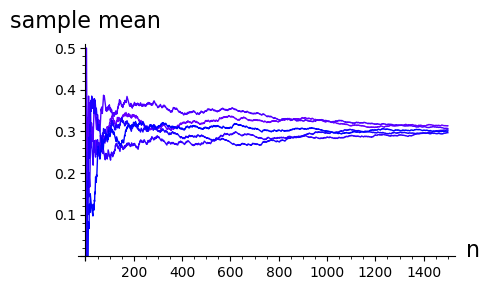

In [3]:
nToGenerate = 1500
iterations = 5
xvalues = range(1, nToGenerate+1,1)
for i in range(iterations):
    redshade = 0.5*(iterations - 1 - i)/iterations # to get different colours for the lines
    bRunningMeans = bernoulliSecretThetaRunningMeans(nToGenerate)
    pts = zip(xvalues,bRunningMeans)
    if (i == 0):
        p = line(pts, rgbcolor = (redshade,0,1))
    else:
        p += line(pts, rgbcolor = (redshade,0,1))
show(p, figsize=[5,3], axes_labels=['n','sample mean'])

What we notice is how the different lines **converge** on a sample mean of close to 0.3. 

Is life always this easy?  Unfortunately no.  In the plot below we show the well-behaved running means for the $Bernoulli$ and beside them the running means for simulated  standard $Cauchy$ random variables.  They are all over the place, and each time you re-evaluate the cell you'll get different all-over-the-place behaviour. 

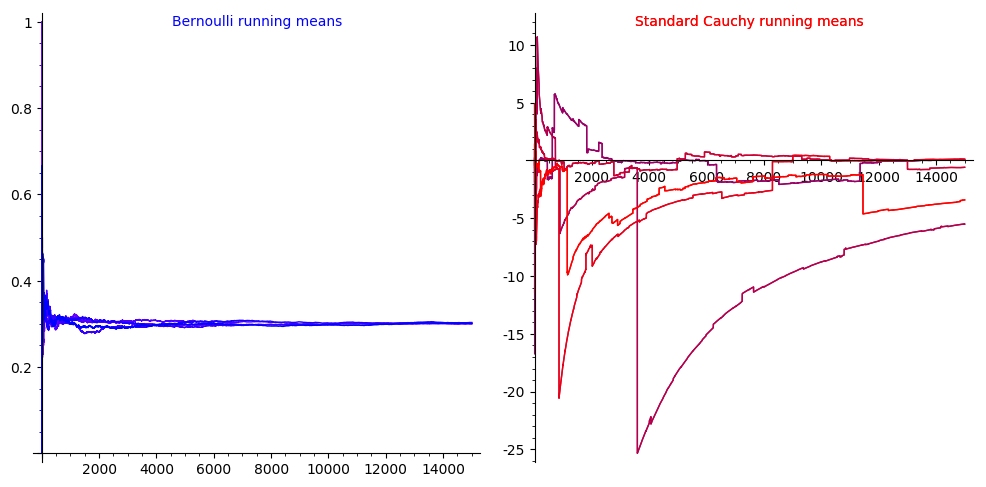

In [6]:
nToGenerate = 15000
iterations = 5
g = twoRunningMeansPlot(nToGenerate, iterations) # uses above function to make plot
show(g,figsize=[10,5])

We talked about the Cauchy in more detail in an earlier notebook.  If you cannot recall the detail and are interested, go back to that in your own time.  The message here is that although with the Bernoulli process, the sample means converge as the number of observations increases, with the Cauchy they do not. 



# Limits of a Sequence of Real Numbers

A sequence of real numbers $x_1, x_2, x_3, \ldots $ (which we can also write as $\{ x_i\}_{i=1}^\infty$) is said to converge to a limit $a \in \mathbb{R}$,

$$\underset{i \rightarrow \infty}{\lim} x_i = a$$

if for every natural number $m \in \mathbb{N}$, a natural number $N_m \in \mathbb{N}$ exists such that for every $j \geq N_m$, $\left|x_j - a\right| \leq \frac{1}{m}$

What is this saying? $\left|x_j - a\right|$ is measuring the closeness of the $j$th value in the sequence to $a$.  If we pick bigger and bigger $m$, $\frac{1}{m}$ will get smaller and smaller.  The definition of the limit is saying that if $a$ is the limit of the sequence then we can get the sequence to become as close as we want ('arbitrarily close') to $a$, and to stay that close, by going far enough into the sequence ('for every $j \geq N_m$, $\left|x_j - a\right| \leq \frac{1}{m}$')

($\mathbb{N}$, the natural numbers, are just the 'counting numbers' $\{1, 2, 3, \ldots\}$.)

 

Take a trivial example, the sequence $\{x_i\}_{i=1}^\infty = 17, 17, 17, \ldots$

Clearly, $\underset{i \rightarrow \infty}{\lim} x_i = 17$, but let's do this formally:

For every $m \in \mathbb{N}$, take $N_m =1$, then

$\forall$ $j \geq N_m=1, \left|x_j -17\right| = \left|17 - 17\right| = 0 \leq \frac{1}{m}$, as required.

($\forall$ is mathspeak for 'for all' or 'for every')



What about $\{x_i\}_{i=1}^\infty = \displaystyle\frac{1}{1}, \frac{1}{2}, \frac{1}{3}, \ldots$, i.e., $x_i = \frac{1}{i}$?

$\underset{i \rightarrow \infty}{\lim} x_i = \underset{i \rightarrow \infty}{\lim}\frac{1}{i} = 0$

For every $m \in \mathbb{N}$, take $N_m = m$, then $\forall$ $j \geq m$, $\left|x_j - 0\right| \leq \left |\frac{1}{m} - 0\right| = \frac{1}{m}$

### YouTry

Think about $\{x_i\}_{i=1}^\infty = \frac{1}{1^p}, \frac{1}{2^p}, \frac{1}{3^p}, \ldots$ with $p > 0$. The limit$\underset{i \rightarrow \infty}{\lim} \displaystyle\frac{1}{i^p} = 0$, provided $p > 0$.

You can draw the plot of this very easily using the Sage symbolic expressions we have already met (`f.subs(...)` allows us to substitute a particular value for one of the symbolic variables in the symbolic function `f`, in this case a value to use for $p$).

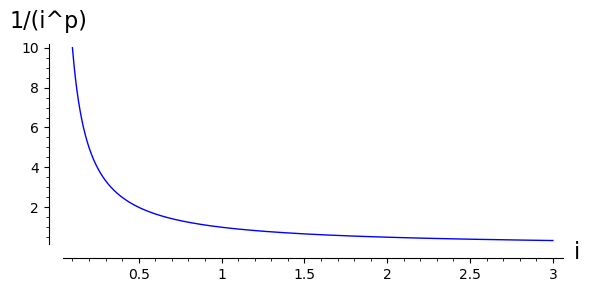

In [7]:
var('i, p')
f = 1/(i^p)
# make and show plot, note we can use f in the label
plot(f.subs(p=1), (x, 0.1, 3), axes_labels=('i',f)).show(figsize=[6,3]) 

What about $\{x_i\}_{i=1}^\infty = 1^{\frac{1}{1}}, 2^{\frac{1}{2}}, 3^{\frac{1}{3}}, \ldots$. The limit$\underset{i \rightarrow \infty}{\lim} i^{\frac{1}{i}} = 1$.

This one is not as easy to see intuitively, but again we can plot it with SageMath.

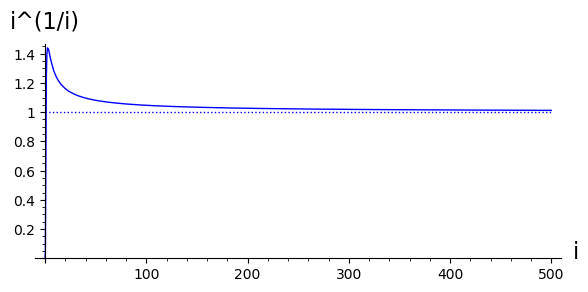

In [8]:
var('i')
f = i^(1/i)
n=500
p=plot(f.subs(p=1), (x, 0, n), axes_labels=('i',f)) # main plot
p+=line([(0,1),(n,1)],linestyle=':') # add a dotted line at height 1
p.show(figsize=[6,3]) # show the plot

Finally, $\{x_i\}_{i=1}^\infty = p^{\frac{1}{1}}, p^{\frac{1}{2}}, p^{\frac{1}{3}}, \ldots$, with $p > 0$. The limit$\underset{i \rightarrow \infty}{\lim} p^{\frac{1}{i}} = 1$ provided $p > 0$.

You can cut and paste (with suitable adaptations) to try to plot this one as well ...

In [7]:
x

x

(end of You Try)

---

*back to the real stuff ...*

# Limits of Functions

We say that a function $f(x): \mathbb{R} \rightarrow \mathbb{R}$ has a limit $L \in \mathbb{R}$ as $x$ approaches $a$:

$$\underset{x \rightarrow a}{\lim} f(x) = L$$

provided $f(x)$ is arbitrarily close to $L$ for all ($\forall$) values of $x$ that are sufficiently close to but not equal to $a$.

For example

Consider the function $f(x) = (1+x)^{\frac{1}{x}}$

$\underset{x \rightarrow 0}{\lim} f(x) = \underset{x \rightarrow 0}{\lim} (1+x)^{\frac{1}{x}} = e \approx 2.71828\cdots$

even though $f(0) = (1+0)^{\frac{1}{0}}$ is undefined!

In [14]:
# x is defined as a symbolic variable by default by Sage so we do not need var('x')
f = (1+x)^(1/x)
# uncomment and try evaluating next line
#f.subs(x=0) # this will give you an error message

BUT: If you are intersted in the "Art of dividing by zero" talk to Professor Warwick Tucker in Maths Department!

You can get some idea of what is going on with two plots on different scales

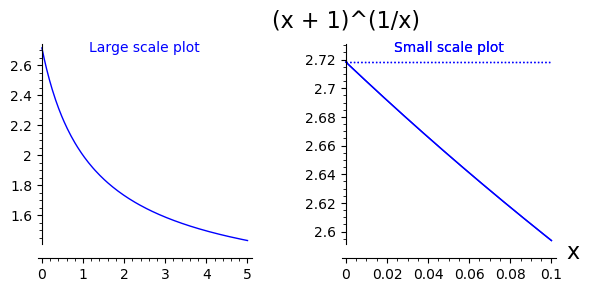

In [15]:
f = (1+x)^(1/x)
n1=5
p1=plot(f.subs(p=1), (x, 0.001, n1), axes_labels=('x',f)) # main plot
t1 = text("Large scale plot", (n1/2,e), rgbcolor='blue',fontsize=10) 
n2=0.1
p2=plot(f.subs(p=1), (x, 0.0000001, n2), axes_labels=('x',f)) # main plot
p2+=line([(0,e),(n2,e)],linestyle=':') # add a dotted line at height e
t2 = text("Small scale plot", (n2/2,e+.01), rgbcolor='blue',fontsize=10) 
show(graphics_array((p1+t1,p2+t2)),figsize=[6,3]) # show the plot

all this has been laying the groundwork for the topic of real interest to us ...

# Limit of a Sequence of Random Variables

We want to be able to say things like $\underset{i \rightarrow \infty}{\lim} X_i = X$ in some sensible way.  $X_i$ are some random variables, $X$ is some 'limiting random variable', but what do we mean by 'limiting random variable'?

To help us, lets introduce a very very simple random variable, one that puts all its mass in one place.  

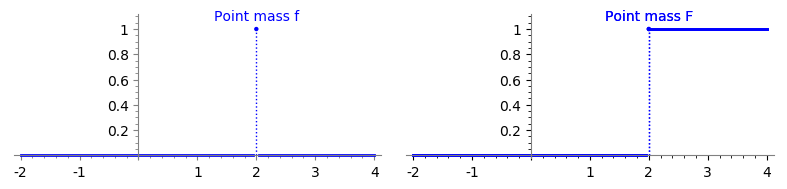

In [11]:
theta = 2.0
show(graphics_array((pmfPointMassPlot(theta),cdfPointMassPlot(theta))),\
     figsize=[8,2]) # show the plots

This is known as the $Point\,Mass(\theta)$ random variable, $\theta \in \mathbb(R)$:  the density $f(x)$ is 1 if $x=\theta$ and 0 everywhere else

$$
f(x;\theta) =
\begin{cases}
0 & \text{ if  }  x \neq \theta \\
1 & \text{ if  } x = \theta
\end{cases}
$$

$$
F(x;\theta) =
\begin{cases}
0 & \text{ if  } x < \theta \\
1 & \text{ if  } x \geq \theta
\end{cases}
$$

So, if we had some sequence $\{\theta_i\}_{i=1}^\infty$ and $\underset{i \rightarrow \infty}{\lim} \theta_i = \theta$

and we had a sequence of random variables $X_i \sim Point\,Mass(\theta_i)$, $i = 1, 2, 3, \ldots$

then we could talk about a limiting random variable as $X \sim Point\,Mass(\theta)$:

i.e., we could talk about $\underset{i \rightarrow \infty}{\lim} X_i = X$

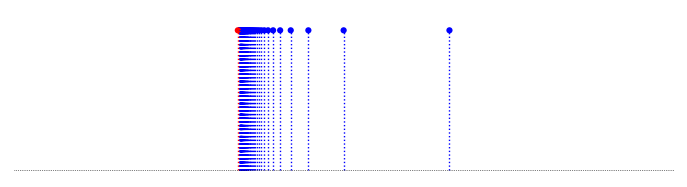

In [16]:
# mock up a picture of a sequence of point mass rvs converging on theta = 0
ptsize = 20
i = 1
theta_i = 1/i
p = points((theta_i,1), rgbcolor="blue", pointsize=ptsize)
p += line([(theta_i,0),(theta_i,1)], rgbcolor="blue", linestyle=':')
while theta_i > 0.01:
    i+=1
    theta_i = 1/i
    p += points((theta_i,1), rgbcolor="blue", pointsize=ptsize)
    p += line([(theta_i,0),(theta_i,1)], rgbcolor="blue", linestyle=':')
p += points((0,1), rgbcolor="red", pointsize=ptsize)
p += line([(0,0),(0,1)], rgbcolor="red", linestyle=':')
p.show(xmin=-1, xmax = 2, ymin=0, ymax = 1.1, axes=false, gridlines=[None,[0]], \
       figsize=[7,2])

Now, we want to generalise this notion of a limit to other random variables (that are not necessarily $Point\,Mass(\theta_i)$ RVs)

What about one many of you will be familiar with - the 'bell-shaped curve' 

## The $Gaussian(\mu, \sigma^2)$ or $Normal(\mu, \sigma^2)$ RV?

The probability density function (PDF) $f(x)$ is given by

$$
f(x ;\mu, \sigma) = \displaystyle\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-1}{2\sigma^2}(x-\mu)^2\right)
$$

The two parameters, $\mu \in \mathbb{R} := (-\infty,\infty)$ and $\sigma \in (0,\infty)$, are sometimes referred to as the location and scale parameters.

To see why this is, use the interactive plot below to have a look at what happens to the shape of the density function $f(x)$ when you change $\mu$ or increase or decrease $\sigma$:

In [17]:
@interact
def _(my_mu=input_box(0, label='mu') ,my_sigma=input_box(1,label='sigma')):
    '''Interactive function to plot the normal pdf and ecdf.'''
    
    if my_sigma > 0:
        html('<h4>Normal('+str(my_mu)+','+str(my_sigma)+'<sup>2</sup>)</h4>')
        var('mu sigma')
        f = (1/(sigma*sqrt(2.0*pi)))*exp(-1.0/(2*sigma^2)*(x - mu)^2)
        p1=plot(f.subs(mu=my_mu,sigma=my_sigma), \
                (x, my_mu - 3*my_sigma - 2, my_mu + 3*my_sigma + 2),\
                axes_labels=('x','f(x)'))
        show(p1,figsize=[8,3])
    else:
        print "sigma must be greater than 0"

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjBlZmUyMDQwNTA+IHdpdGggMiB3aWRnZXRzCiAgbXlfbXU6IEV2YWxUZXh0KHZhbHVlPXUnMCcsIGRlc2NyaXB0aW9uPXXigKY=


Consider the sequence of random variables $X_1, X_2, X_3, \ldots$, where

- $X_1 \sim Normal(0, 1)$
- $X_2 \sim Normal(0, \frac{1}{2})$
- $X_3 \sim Normal(0, \frac{1}{3})$
- $X_4 \sim Normal(0, \frac{1}{4})$
- $\vdots$
- $X_i \sim Normal(0, \frac{1}{i})$
- $\vdots$

We can use the animation below to see how the PDF $f_{i}(x)$ looks as we move through the sequence of $X_i$ (the animation only goes to $i = 25$, $\sigma = 0.04$ but you get the picture ...)

<table style="width:100%">
  <tr>
    <th>Normal curve animation, looping through $\sigma = \frac{1}{i}$ for $i = 1, \dots, 25$</th> 
  </tr>
<tr>
    <th><img src="images/normalDecreasing.gif" width=300></th> 
  </tr>
</table>

We can see that the probability mass of $X_i \sim Normal(0, \frac{1}{i})$ increasingly concentrates about 0 as $i \rightarrow \infty$ and $\frac{1}{i} \rightarrow 0$

Does this mean that $\underset{i \rightarrow \infty}{\lim} X_i = Point\,Mass(0)$?

No, because for any $i$, however large, $P(X_i = 0) = 0$ because $X_i$ is a continuous RV (for any continous RV $X$, for any $x \in \mathbb{R}$, $P(X=x) = 0$).

So, we need to refine our notions of convergence when we are dealing with random variables

# Convergence in Distribution

Let $X_1, X_2, \ldots$ be a sequence of random variables and let $X$ be another random variable.  Let $F_i$ denote the distribution function (DF) of $X_i$ and let $F$ denote the distribution function of $X$.

Now, if for any real number $t$ at which $F$ is continuous,

$$\underset{i \rightarrow \infty}{\lim} F_i(t) = F(t)$$

(in the sense of the convergence or limits of functions we talked about earlier)

Then we can say that the sequence or RVs $X_i$, $i = 1, 2, \ldots$ **converges to $X$ in distribution** and write $X_i \overset{d}{\rightarrow} X$.

An equivalent way of defining convergence in distribution is to go right back to the meaning of the probabilty space 'under the hood' of a random variable, a random variable $X$ as a mapping from the sample space $\Omega$ to the real line ($X: \Omega \rightarrow \mathbb{R}$), and the sample points or outcomes in the sample space, the $\omega \in \Omega$.  For $\omega \in \Omega$, $X(\omega)$ is the mapping of $\omega$ to the real line $\mathbb{R}$.  We could look at the set of $\omega$ such that $X(\omega) \leq t$, i.e. the set of $\omega$ that map to some value on the real line less than or equal to $t$, $\{\omega: X(\omega) \leq t \}$. 

Saying that for any $t \in \mathbb{R}$, $\underset{i \rightarrow \infty}{\lim} F_i(t) = F(t)$ is the equivalent of saying that for any $t \in \mathbb{R}$, 

$$\underset{i \rightarrow \infty}{\lim} P\left(\{\omega:X_i(\omega) \leq t \}\right) = P\left(\{\omega: X(\omega) \leq t\right)$$

Armed with this, we can go back to our sequence of $Normal$ random variables  $X_1, X_2, X_3, \ldots$, where

- $X_1 \sim Normal(0, 1)$
- $X_2 \sim Normal(0, \frac{1}{2})$
- $X_3 \sim Normal(0, \frac{1}{3})$
- $X_4 \sim Normal(0, \frac{1}{4})$
- $\vdots$
- $X_i \sim Normal(0, \frac{1}{i})$
- $\vdots$

and let $X \sim Point\,Mass(0)$,

and say that the $X_i$ **converge in distribution** to the $x \sim Point\,Mass$ RV $X$,

$$X_i \overset{d}{\rightarrow} X$$

What we are saying with convergence in distribution, informally, is that as $i$ increases, we increasingly expect to see the next outcome in a sequence of random experiments becoming better and better modeled by the limiting random variable.  In this case, as $i$ increases, the $Point\,Mass(0)$ is becoming a better and better model for the next outcome of a random experiment with outcomes $\sim Normal(0,\frac{1}{i})$.

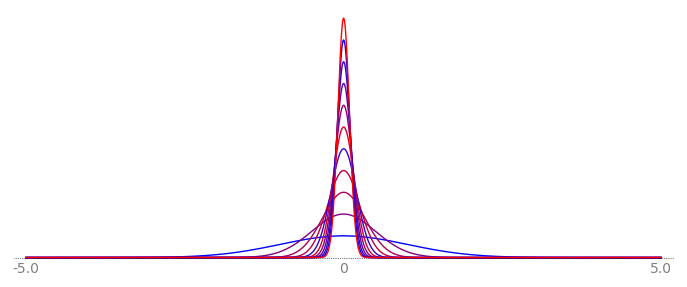

In [18]:
# mock up a picture of a sequence of converging normal distributions
my_mu = 0
upper = my_mu + 5; lower = -upper;     # limits for plot
var('mu sigma')
stop_i = 12
html('<h4>N(0,1) to N(0, 1/'+str(stop_i)+')</h4>')
f = (1/(sigma*sqrt(2.0*pi)))*exp(-1.0/(2*sigma^2)*(x - mu)^2)
p=plot(f.subs(mu=my_mu,sigma=1.0), (x, lower, upper), rgbcolor = (0,0,1))
for i in range(2, stop_i, 1): # just do a few of them
    shade = 1-11/i # make them different colours
    p+=plot(f.subs(mu=my_mu,sigma=1/i), (x, lower, upper), rgbcolor = (1-shade, 0, shade))
textOffset = -0.2 # offset for placement of text -  may need adjusting 
p+=text("0",(0,textOffset),fontsize = 10, rgbcolor='grey') 
p+=text(str(upper.n(digits=2)),(upper,textOffset),fontsize = 10, rgbcolor='grey') 
p+=text(str(lower.n(digits=2)),(lower,textOffset),fontsize = 10, rgbcolor='grey') 
p.show(axes=false, gridlines=[None,[0]], figsize=[7,3])

#### There is an interesting point to note about this convergence: 

We have said that the $X_i \sim Normal(0,\frac{1}{i})$ with distribution functions $F_i$ converge in distribution to $X \sim Point\,Mass(0)$ with distribution function $F$, which means that we must be able to show that for any real number $t$ at which $F$ is continuous,

$$\underset{i \rightarrow \infty}{\lim} F_i(t) = F(t)$$

Note that for any of the $X_i \sim Normal(0, \frac{1}{i})$, $F_i(0) = \frac{1}{2}$, and also note that for $X \sim Point,Mass(0)$, $F(0) = 1$, so clearly $F_i(0) \neq F(0)$.  

What has gone wrong?  

Nothing:  we said that we had to be able to show that $\underset{i \rightarrow \infty}{\lim} F_i(t) = F(t)$ for any $t \in \mathbb{R}$ at which $F$ is continuous, but the $Point\,Mass(0)$ distribution function $F$ is not continous at 0!

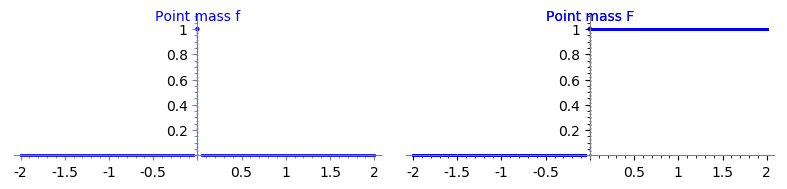

In [19]:
theta = 0.0
# show the plots
show(graphics_array((pmfPointMassPlot(theta),cdfPointMassPlot(theta))),figsize=[8,2]) 

# Convergence in Probability

Let $X_1, X_2, \ldots$ be a sequence of random variables and let $X$ be another random variable.  Let $F_i$ denote the distribution function (DF) of$X_i$ and let $F$ denote the distribution function of $X$.

Now, if for any real number $\varepsilon > 0$,

$$\underset{i \rightarrow \infty}{\lim} P\left(|X_i - X| > \varepsilon\right) = 0$$

Then we can say that the sequence $X_i$, $i = 1, 2, \ldots$ **converges to $X$ in probability** and write $X_i \overset{P}{\rightarrow} X$.

Or, going back again to the probability space 'under the hood' of a random variable,  we could look the way the $X_i$ maps each outcome $\omega \in \Omega$, $X_i(\omega)$, which is some point on the real line, and compare this to mapping $X(\omega)$.   

Saying that for any $\varepsilon \in \mathbb{R}$, $\underset{i \rightarrow \infty}{\lim} P\left(|X_i - X| > \varepsilon\right) = 0$ is the equivalent of saying that for any $\varepsilon \in \mathbb{R}$, 

$$\underset{i \rightarrow \infty}{\lim} P\left(\{\omega:|X_i(\omega) - X(\omega)| > \varepsilon \}\right) = 0$$

Informally, we are saying $X$ is a limit in probabilty if, by going far enough into the sequence $X_i$, we can ensure that the mappings $X_i(\omega)$ and $X(\omega)$ will be arbitrarily close to each other on the real line for all $\omega \in \Omega$.

**Note** that convergence in distribution is implied by convergence in probability: convergence in distribution is the weakest form of convergence; any sequence of RV's that converges in probability to some RV $X$ also converges in distribution to $X$ (but not necessarily vice versa).  

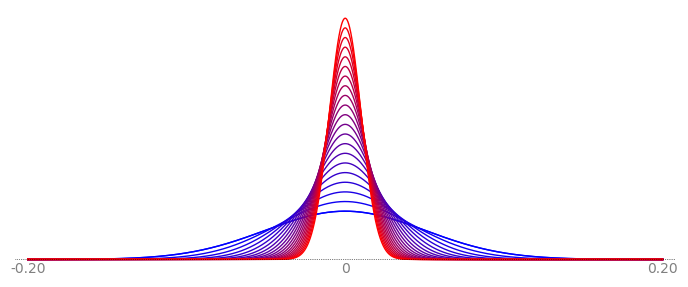

In [20]:
# mock up a picture of a sequence of converging normal distributions
my_mu = 0
var('mu sigma')
upper = 0.2; lower = -upper
i = 20 # start part way into the sequence
lim = 100 # how far to go
stop_i = 12
html('<h4>N(0,1/'+str(i)+') to N(0, 1/'+str(lim)+')</h4>')
f = (1/(sigma*sqrt(2.0*pi)))*exp(-1.0/(2*sigma^2)*(x - mu)^2)
p=plot(f.subs(mu=my_mu,sigma=1.0/i), (x, lower, upper), rgbcolor = (0,0,1))
for j in range(i, lim+1, 4): # just do a few of them
    shade = 1-(j-i)/(lim-i) # make them different colours
    p+=plot(f.subs(mu=my_mu,sigma=1/j), (x, lower,upper), rgbcolor = (1-shade, 0, shade))
textOffset = -1.5 # offset for placement of text -  may need adjusting 
p+=text("0",(0,textOffset),fontsize = 10, rgbcolor='grey') 
p+=text(str(upper.n(digits=2)),(upper,textOffset),fontsize = 10, rgbcolor='grey') 
p+=text(str(lower.n(digits=2)),(lower,textOffset),fontsize = 10, rgbcolor='grey') 
p.show(axes=false, gridlines=[None,[0]], figsize=[7,3])

For our sequence of $Normal$ random variables  $X_1, X_2, X_3, \ldots$, where

- $X_1 \sim Normal(0, 1)$
- $X_2 \sim Normal(0, \frac{1}{2})$
- $X_3 \sim Normal(0, \frac{1}{3})$
- $X_4 \sim Normal(0, \frac{1}{4})$
- $\vdots$
- $X_i \sim Normal(0, \frac{1}{i})$
- $\vdots$

and $X \sim Point\,Mass(0)$,

It can be shown that the $X_i$ converge in probability to $X \sim Point\,Mass(0)$ RV $X$,

$$X_i \overset{P}{\rightarrow} X$$

(the formal proof of this involves Markov's Inequality, which is beyond the scope of this course). 

# Some Basic Limit Laws in Statistics

Intuition behind Law of Large Numbers and Central Limit Theorem

Take a look at the Khan academy videos on the Law of Large Numbers and the Central Limit Theorem. This will give you a working idea of these theorems.  In the sequel, we will strive for a deeper understanding of these theorems on the basis of the two notions of convergence of sequences of random variables we just saw.
   

## Weak Law of Large Numbers

Remember that a statistic is a random variable, so a sample mean is a random variable. If we are given a sequence of independent and identically distributed RVs, $X_1,X_2,\ldots \overset{IID}{\sim} X_1$, then we can also think of a sequence of random variables $\overline{X}_1, \overline{X}_2, \ldots, \overline{X}_n, \ldots$ ($n$ being the sample size). 

Since $X_1, X_2, \ldots$ are $IID$, they all have the same expection, say $E(X_1)$ by convention.

If $E(X_1)$ exists, then the sample mean $\overline{X}_n$ converges in probability to $E(X_1)$ (i.e., to the expectatation of any one of the individual RVs):

$$
\text{If} \quad X_1,X_2,\ldots \overset{IID}{\sim} X_1 \ \text{and if } \ E(X_1) \ \text{exists, then } \ \overline{X}_n \overset{P}{\rightarrow} E(X_1) \ .
$$

Going back to our definition of convergence in probability, we see that this means that for any real number $\varepsilon > 0$, $\underset{n \rightarrow \infty}{\lim} P\left(|\overline{X}_n - E(X_1)| > \varepsilon\right) = 0$

Informally, this means that means that, by taking larger and larger samples we can make the probability that the average of the observations is more than $\varepsilon$ away from the expected value get smaller and smaller.

Proof of this is beyond the scope of this course, but we have already seen it in action when we looked at the $Bernoulli$ running means.  Have another look, this time with only one sequence of running means.  You can increase $n$, the sample size, and change $\theta$.  Note that the seed for the random number generator is also under your control.   This means that you can get replicable samples:  in particular, in this interact, when you increase the sample size it looks as though you are just adding more to an existing sample rather than starting from scratch with a new one.  

In [21]:
@interact
def _(nToGen=slider(1,1500,1,100,label='n'),my_theta=input_box(0.3,label='theta'),rSeed=input_box(1234,label='random seed')):
    '''Interactive function to plot running mean for a Bernoulli with specified n, theta and random number seed.'''
    
    if my_theta >= 0 and my_theta <= 1:
        html('<h4>Bernoulli('+str(my_theta.n(digits=2))+')</h4>')
        xvalues = range(1, nToGen+1,1)
        bRunningMeans = bernoulliRunningMeans(nToGen, myTheta=my_theta, mySeed=rSeed)
        pts = zip(xvalues, bRunningMeans)
        p = line(pts, rgbcolor = (0,0,1))
        p+=line([(0,my_theta),(nToGen,my_theta)],linestyle=':',rgbcolor='grey')
        show(p, figsize=[5,3], axes_labels=['n','sample mean'],ymax=1)
    else:
        print 'Theta must be between 0 and 1'

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjBlZmM3YjZhMjg+IHdpdGggMyB3aWRnZXRzCiAgblRvR2VuOiBUcmFuc2Zvcm1JbnRTbGlkZXIodmFsdWU9MTAwLCBkZXPigKY=


# Central Limit Theorem

You have probably all heard of the Central Limit Theorem before, but now we can relate it to our definition of convergence in distribution.  

Let $X_1,X_2,\ldots \overset{IID}{\sim} X_1$ and suppose $E(X_1)$ and $V(X_1)$ both exist,

then

$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i  \overset{d}{\rightarrow} X \sim Normal \left(E(X_1),\frac{V(X_1)}{n} \right)
$$

And remember $Z \sim Normal(0,1)$?

Consider $Z_n := \displaystyle\frac{\overline{X}_n-E(\overline{X}_n)}{\sqrt{V(\overline{X}_n)}} = \displaystyle\frac{\sqrt{n} \left( \overline{X}_n -E(X_1) \right)}{\sqrt{V(X_1)}}$

If $\overline{X}_n = \displaystyle\frac{1}{n} \displaystyle\sum_{i=1}^n X_i  \overset{d}{\rightarrow}  X \sim Normal \left(E(X_1),\frac{V(X_1)}{n} \right)$, then $\overline{X}_n -E(X_1)  \overset{d}{\rightarrow}  X-E(X_1) \sim Normal \left( 0,\frac{V(X_1)}{n} \right)$

and $\sqrt{n} \left( \overline{X}_n -E(X_1) \right)  \overset{d}{\rightarrow}  \sqrt{n} \left( X-E(X_1) \right) \sim Normal \left( 0,V(X_1) \right)$

so $Z_n := \displaystyle \frac{\overline{X}_n-E(\overline{X}_n)}{\sqrt{V(\overline{X}_n)}} = \displaystyle\frac{\sqrt{n} \left( \overline{X}_n -E(X_1) \right)}{\sqrt{V(X_1)}}  \overset{d}{\rightarrow}  Z \sim Normal \left( 0,1 \right)$

Thus, for sufficiently large $n$ (say $n>30$), probability statements about $\overline{X}_n$ can be approximated using the $Normal$ distribution. 

The beauty of the CLT, as you have probably seen from other courses, is that $\overline{X}_n \overset{d}{\rightarrow} Normal \left( E(X_1), \frac{V(X_1)}{n} \right)$ does not require the $X_i$ to be normally distributed. 

We can try this with our $Bernoulli$ RV generator.  First, a small number of samples:

In [74]:
theta, n, samples = 0.6, 10, 5 # concise way to set some variable values
sampleMeans=[] # empty list
for i in range(0, samples, 1):  # loop 
    thisMean = QQ(sum(bernoulliSample(n, theta)))/n # get a sample and find the mean
    sampleMeans.append(thisMean) # add mean to the list of means
sampleMeans    # disclose the sample means

[3/5, 7/10, 1/5, 1/2, 3/5]

You can use the interactive plot to increase the number of samples and make a histogram of the sample means.  According to the CLT, for lots of reasonably-sized samples we should get a nice symmetric bell-curve-ish histogram centred on $\theta$.  You can adjust the number of bins in the histogram as well as the number of samples, sample size, and $\theta$.   

In [75]:
import pylab
@interact
def _(replicates=slider(1,3000,1,100,label='replicates'), \
      nToGen=slider(1,1500,1,100,label='sample size n'),\
      my_theta=input_box(0.3,label='theta'),Bins=5):
    '''Interactive function to plot distribution of replicates of sample means for n IID Bernoulli trials.'''
    
    if my_theta >= 0 and my_theta <= 1 and replicates > 0:
        sampleMeans=[] # empty list
        for i in range(0, replicates, 1):          
            thisMean = RR(sum(bernoulliSample(nToGen, my_theta)))/nToGen
            sampleMeans.append(thisMean)
        pylab.clf() # clear current figure
        n, bins, patches = pylab.hist(sampleMeans, Bins, density=true) 
        pylab.ylabel('normalised count')
        pylab.title('Normalised histogram for Bernoulli sample means')
        pylab.savefig('myHist') # to actually display the figure
        pylab.show()
        #show(p, figsize=[5,3], axes_labels=['n','sample mean'],ymax=1)
    else:
        print 'Theta must be between 0 and 1, and samples > 0'

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjBmMGY5OTE3ZDA+IHdpdGggNCB3aWRnZXRzCiAgcmVwbGljYXRlczogVHJhbnNmb3JtSW50U2xpZGVyKHZhbHVlPTEwMCzigKY=


Increase the sample size and the numbe rof bins in the above interact and see if the histograms of the sample means are looking more and more normal as the CLT would have us believe.

But although the $X_i$ do not have to be $\sim Normal$ for $\overline{X}_n = \overset{d}{\rightarrow} X \sim Normal\left(E(X_1),\frac{V(X_1)}{n} \right)$, remember that we said "Let $X_1,X_2,\ldots \overset{IID}{\sim} X_1$ and suppose $E(X_1)$ and $V(X_1)$ both exist", then,

$$
\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i  \overset{d}{\rightarrow} X \sim Normal \left(E(X_1),\frac{V(X_1)}{n} \right)
$$

This is where is all goes horribly wrong for the standard $Cauchy$ distribution (any $Cauchy$ distribution in fact):  neither the expectation nor the variance exist for this distribution.  The Central Limit Theorem cannot be applied here.  In fact, if $X_1,X_2,\ldots \overset{IID}{\sim}$ standard $Cauchy$, then $\overline{X}_n = \displaystyle \frac{1}{n} \sum_{i=1}^n X_i  \sim$ standard $Cauchy$.

### YouTry

Try looking at samples from two other RVs where the expectation and variance do exist, the $Uniform$ and the $Exponential$:

In [76]:
import pylab
@interact
def _(replicates=input_box(100,label='replicates'), \
      nToGen=slider(1,1500,1,100,label='sample size n'),\
      my_theta1=input_box(2,label='theta1'),\
      my_theta2=input_box(4,label='theta1'),Bins=5):
    '''Interactive function to plot distribution of 
    sample means for n IID Uniform(theta1, theta2) trials.'''
    
    if (my_theta1 < my_theta2) and replicates > 0:
        sampleMeans=[] # empty list
        for i in range(0, replicates, 1):
            
            thisMean = RR(sum(uniformSample(nToGen, my_theta1, my_theta2)))/nToGen
            sampleMeans.append(thisMean)
        pylab.clf() # clear current figure
        n, bins, patches = pylab.hist(sampleMeans, Bins, density=true) 
        pylab.ylabel('normalised count')
        pylab.title('Normalised histogram for Uniform sample means')
        pylab.savefig('myHist') # to actually display the figure
        pylab.show()
        #show(p, figsize=[5,3], axes_labels=['n','sample mean'],ymax=1)
    else:
        print 'theta1 must be less than theta2, and samples > 0'

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjBlZmNjMjg1ZjA+IHdpdGggNSB3aWRnZXRzCiAgcmVwbGljYXRlczogRXZhbFRleHQodmFsdWU9dScxMDAnLCBkZXNjcmnigKY=


In [35]:
import pylab
@interact
def _(replicates=input_box(100,label='replicates'), \
      nToGen=slider(1,1500,1,100,label='sample size n'),\
      my_lambda=input_box(0.1,label='lambda'),Bins=5):
    '''Interactive function to plot distribution of \
    sample means for an Exponential(lambda) process.'''
    
    if my_lambda > 0 and replicates > 0:
        sampleMeans=[] # empty list
        for i in range(0, replicates, 1):            
            thisMean = RR(sum(exponentialSample(nToGen, my_lambda)))/nToGen
            sampleMeans.append(thisMean)
        pylab.clf() # clear current figure
        n, bins, patches = pylab.hist(sampleMeans, Bins, density=true) 
        pylab.ylabel('normalised count')
        pylab.title('Normalised histogram for Exponential sample means')
        pylab.savefig('myHist') # to actually display the figure
        pylab.show()
        #show(p, figsize=[5,3], axes_labels=['n','sample mean'],ymax=1)
    else:
        print 'lambda must be greater than 0, and samples > 0'

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjBlZmQ0MTI5YjA+IHdpdGggNCB3aWRnZXRzCiAgcmVwbGljYXRlczogRXZhbFRleHQodmFsdWU9dScxMDAnLCBkZXNjcmnigKY=


# Properties of the MLE

The LLN (law of large numbers) and CLT (central limit theorem) are statements about the limiting distribution of the sample mean of IID random variables whose expectation and variance exists. How does this apply to the MLE (maximum likelihood estimator)?

Consider the following generic parametric model for our data or observations:

$$
X_1,X_2,\ldots,X_n \overset{IID}{\sim} F(x; \theta^*) \ \text{ or } \ f(x; \theta^*)
$$

We do not know the true parameter $\theta^*$ under the model for our data. Our task is to estimate the unknown parameter $\theta^*$ using the MLE:

$$\widehat{\Theta}_n = argmax_{\theta \in \mathbf{\Theta}} l(\theta)$$

The amazing think about the MLE is its following properties:

### 1. The MLE is *asymptotically consistent*

$$\boxed{\widehat{\Theta}_n \overset{P}{\rightarrow} \theta^*}$$

So when the number of observations (sample size $n$) goes to infinity, our MLE converges in probability to the true parameter $\theta^* \in \mathbf{\Theta}$.

Interestingly, one can work out the details and find that the MLE $\widehat{\Theta}_n$, which is also a random variable based on $n$ IID samples that takes values in the parameter space $\mathbf{\Theta}$, is also normally distributed for large sample sizes.

### 2. The MLE is *equivariant*

$$\boxed{\text{If } \ \widehat{\Theta}_n \ \text{ is the MLE of } \ \theta^* \ \text{ then } \ g(\widehat{\Theta}_n) \ \text{ is the MLE of } \ g(\theta^*)}$$

This is a very useful property, since any function $g : \mathbf{\Theta} \to \mathbb{R}$ of interest is at our disposal by merely applying $g$ to the the MLE. Often $g$ is some sort of reward that depends on the unknown parameter $\theta^*$.

### 3. The MLE is *asymptotically normal* 

$$\boxed{ \frac{\left(\widehat{\Theta}_n - \theta^*\right)}{\widehat{se}_n} \overset{d}{\rightarrow} Normal(0,1) }
\quad \text{ or equivalently, } \quad
\boxed{ \widehat{\Theta}_n \overset{d}{\rightarrow} Normal( \theta^*, \widehat{se}_n^2) }
$$

where, $\widehat{se}_n$ is the *estimated standard error* of the MLE:

$$\boxed{ \widehat{se}_n \ \text{ is an estimate of the } \ \sqrt{V\left(\widehat{\Theta}_n \right)}}$$

We can compute $\widehat{se}_n$ with the following formula:

$$\boxed{\widehat{se}_n = \sqrt{\frac{1}{ \left.  n E \left(-\frac{\partial^2 \log f(X;\theta)}{\partial \theta^2} \right) \right\vert_{\theta=\widehat{\theta}_n} } }}$$

where, the expectation is called the *Fisher information* of one sample or $I_1$:

$$\boxed{ I_1 := E \left(-\frac{\partial^2 \log f(X;\theta)}{\partial \theta^2} \right)  = 
\begin{cases}
\displaystyle{\int{\left(-\frac{\partial^2 \log f(x;\theta)}{\partial \theta^2} \right) f(x; \theta)} dx} & \text{ for continuous RV } X\\
\displaystyle{\sum_x{\left(-\frac{\partial^2 \log f(x;\theta)}{\partial \theta^2} \right) f(x; \theta)}}& \text{ for discrete RV } X
\end{cases}
}
$$

Other two properties (not needed for this course) include:

- *asymptotic efficiency*, i.e., among a class of well-behaved estimators, the MLE has the smallest variance at least for large samples, and
- *approximately Bayes*, i.e., the MLE is approximately the *Bayes estimator* (some of you may see Bayesian methods of estimation in advanced courses in statistical machine learning or in latest AI methods).

# Confidence Interval and Set Estimation from MLE

An immediate implication of the asymptotic normality of the MLE, which informally states that the distribution of the MLE can be approximated by a Normal random variable, is to obtain confidence intervals for the unkown parameter $\theta^*$.

Recall that in set estimation, as opposed to point estimation, we estimate the unknown parameter using a random set based on the data (typically intervals in 1D) that "traps" the true parameter $\theta^*$ with a very high probability, say $0.95$. We typically express such probality in terms of $1-\alpha$, so the $95\%$ confidence interval is seen as a $1-\alpha$ confidence interval with $\alpha=0.05$. From the the asymptotic normality of the MLE, we get the following confidence interval for the unknown $\theta^*$:


$$
\boxed{\text{If } \quad 
\displaystyle{C_n := \left( \widehat{\Theta}_n - z_{\alpha/2} \widehat{se}_n, \, \widehat{\Theta}_n + z_{\alpha/2} \widehat{se}_n \right)} \quad \text{ then } \quad P \left( \{ \theta^* \in C_n \} ; \theta^* \right) \underset{n \to \infty}{\longrightarrow} 1-\alpha , \quad \text{ where } z_{\alpha/2} = \Phi^{[-1]}(1-\alpha/2).
}
$$

Recall that $P \left( \{ \theta^* \in C_n \} ; \theta^* \right)$ is simply the probability of the event that $\theta^*$ will be in $C_n$, the $1-\alpha$ confidence interval, given the data is distributed according to the model with true parameter $\theta^*$.

NOTE: $\Phi^{[-1]}(1-\alpha/2)$ is merely the inverse distribution function (CDF) of the standard normal RV. 

$$
\text{For } \alpha=0.05, z_{\alpha/2}=1.96 \approxeq 2, \text{ so: } \quad \boxed{\widehat{\Theta}_n \pm 2 \widehat{se}_n} \quad \text{ is an approximate 95% confidence interval.}
$$

## Example of Confidence Interval for IID $Bernoulli(\theta)$ Trials

We already know that the MLE for the model with $n$ IID $Bernoulli(\theta)$ Trials is the sample mean, i.e.,

$$X_1,X_2,\ldots, X_n \overset{IID}{\sim} Bernoulli(\theta^*) \implies \widehat{\Theta}_n = \overline{X}_n$$

Our task now is to obtain the $1-\alpha$ confidence interval based on this MLE.

To get the confidence interval we need to obtain $\widehat{se}_n$ by computing the following:

$$
\begin{array}{cc}
\widehat{se}_n &=& \displaystyle{\sqrt{\frac{1}{ \left.  n E \left(-\frac{\partial^2 \log f(X;\theta)}{\partial \theta^2} \right) \right\vert_{\theta=\widehat{\theta}_n} } }}
\end{array}
$$
$I_1 := E \left(-\frac{\partial^2 \log f(X;\theta)}{\partial \theta^2} \right)$ is called the Fisher Information of one sample.
Since our IID samples are from a discrete distribution with 

$$
\begin{array}{cc}
f(x; \theta) =  \theta^x (1-\theta)^{1-x} 
&\implies& \displaystyle{\log \left( f(x;\theta) \right) = x \log(\theta) +(1-x) \log(1-\theta)}\\
&\implies& \displaystyle{\frac{\partial}{\partial \theta} \left(\log \left( f(x;\theta) \right)\right)} 
= \displaystyle{\frac{x}{\theta} -\frac{1-x}{1-\theta}} \\
&\implies& \displaystyle{\frac{\partial^2}{\partial \theta^2} \left(\log \left( f(x;\theta) \right)\right)} 
= \displaystyle{-\frac{x}{\theta^2}  - \frac{1-x}{(1-\theta)^2}}\\
&\implies& \displaystyle{E  \left( - \frac{\partial^2}{\partial \theta^2} \left(\log \left( f(x;\theta) \right)\right) \right)} 
= \displaystyle{\sum_{x\in\{0,1\}} \left( \frac{x}{\theta^2}  + \frac{1-x}{(1-\theta)^2} \right) f(x; \theta)  = \frac{\theta}{\theta^2} + \frac{1-\theta}{(1-\theta)^2} = \frac{1}{\theta(1-\theta)}}
\end{array}
$$

Note that we have implicitly assumed that the $x$ values are only $0$ or $1$ by ignoring the indicator term $\mathbf{1}_{\{0,1\}}(x)$ in $f(x;\theta)$. But this is okay as we are carefully doing the sums over just $x \in \{0,1\}$.

Now, by using the formula for $\widehat{se}_n$, we can obtain:

$$
\begin{array}{cc}
\widehat{se}_n 
&=& \displaystyle{\sqrt{\frac{1}{ \left.  n E \left(-\frac{\partial^2 \log f(X;\theta)}{\partial \theta^2} \right) \right\vert_{\theta=\widehat{\theta}_n} } }}\\
&=& \displaystyle{\sqrt{\frac{1}{ \left.  n \frac{1}{\theta(1-\theta)} \right\vert_{\theta=\widehat{\theta}_n} } }}\\
&=& \displaystyle{\sqrt{\frac{\widehat{\theta}_n(1-\widehat{\theta}_n)}{n}}}
\end{array}
$$

Finally, we can complete our task by obtaining the 95% confidence interval for $\theta^*$ as follows:

$$
\displaystyle{ \widehat{\theta}_n \pm 2 \widehat{se}_n =  \widehat{\theta}_n \pm 2 \sqrt{\frac{\widehat{\theta}_n(1-\widehat{\theta}_n)}{n}}  = \overline{x}_n \pm 2 \sqrt{\frac{\overline{x}_n(1-\overline{x}_n)}{n}} }
$$

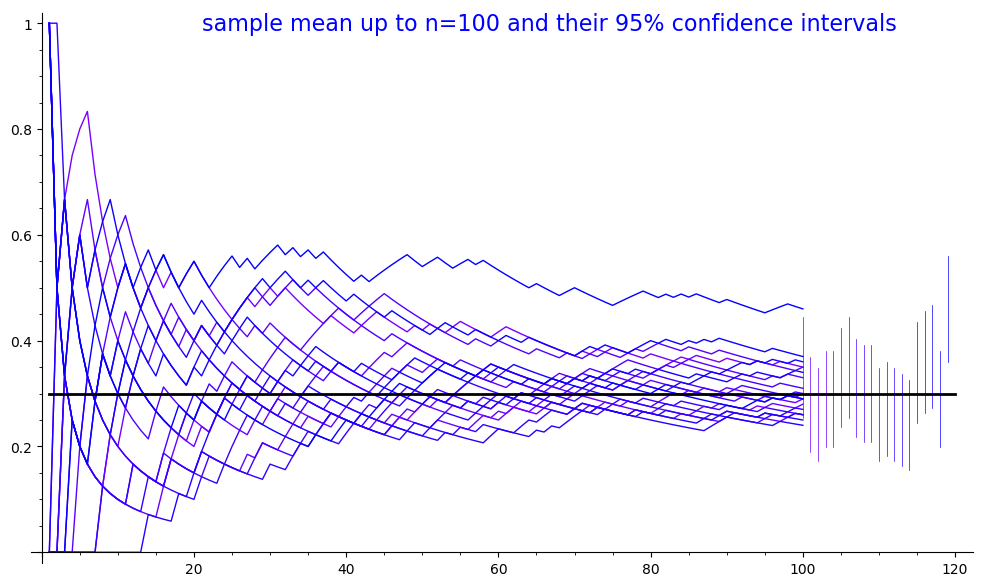

In [78]:
nToGenerate = 100
replicates = 20
xvalues = range(1, nToGenerate+1,1)
for i in range(replicates):
    redshade = 0.5*(replicates - 1 - i)/replicates # to get different colours for the lines
    bRunningMeans = bernoulliSecretThetaRunningMeans(nToGenerate)
    pts = zip(xvalues,bRunningMeans)
    if (i == 0):
        p = line(pts, rgbcolor = (redshade,0,1))
    else:
        p += line(pts, rgbcolor = (redshade,0,1))
    mle=bRunningMeans[nToGenerate-1]
    se95Correction=2.0*sqrt(mle*(1-mle)/nToGenerate)
    lower95CI = mle-se95Correction
    upper95CI = mle+se95Correction
    p += line([(nToGenerate+i,lower95CI),(nToGenerate+i,upper95CI)], rgbcolor = (redshade,0,1), thickness=0.5)
p += line([(1,0.3),(nToGenerate+replicates,0.3)], rgbcolor='black', thickness='2')
p += text('sample mean up to n='+str(nToGenerate)+' and their 95% confidence intervals',(nToGenerate/1.5,1),fontsize=16)
show(p, figsize=[10,6])

# Sample Exam Problem 5

Obtain the 95% Confidence Interval for the $\lambda^*$ from the experiment based on $n$ IID $Exponential(\lambda)$ trials.

Write down your answer by returning the right answer in the function `SampleExamProblem5` in the next cell.
Your function call `SampleExamProblem5(sampleWaitingTimes)` on the Orbiter waiting times data should return the 95% confidence interval for the unknown parameter $\lambda^*$.

In [ ]:
# Sample Exam Problem 5
# Only replace the XXX below, do not change the function naemes or parameters
sampleWaitingTimes = np.array([8,3,7,18,18,3,7,9,9,25,0,0,25,6,10,0,10,8,16,9,1,5,16,6,4,1,3,21,0,28,3,8,6,6,11,\
                               8,10,15,0,8,7,11,10,9,12,13,8,10,11,8,7,11,5,9,11,14,13,5,8,9,12,10,13,6,11,13,0,\
                               0,11,1,9,5,14,16,2,10,21,1,14,2,10,24,6,1,14,14,0,14,4,11,15,0,10,2,13,2,22,10,5,\
                               6,13,1,13,10,11,4,7,9,12,8,16,15,14,5,10,12,9,8,0,5,13,13,6,8,4,13,15,7,11,6,23,1])

def SampleExamProblem5(exponentialSamples):
    '''return the 95% confidence interval as a 2-tuple for the unknown rate parameter lambda* 
    from n IID Exponential(lambda*) trials in the input numpy array called exponentialSamples'''
    XXX
    XXX
    XXX
    lower95CI=XXX
    upper95CI=XXX
    return (lower95CI,upper95CI)

# do NOT change anything below
lowerCISampleExamProblem5,upperCISampleExamProblem5 = SampleExamProblem5(sampleWaitingTimes)
print "The 95% CI for lambda in the Orbiter Waiting time experiment = "
print (lowerCISampleExamProblem5,upperCISampleExamProblem5)

# Sample Exam Problem 5 Solution

We can obtain the 95% Confidence Interval for the $\lambda^*$ for the experiment based on $n$ IID $Exponential(\lambda)$ trials, by hand or using SageMath symbolic computations (typically both).

Let $X_1,X_2,\ldots,X_n \overset{IID}{\sim} Exponential(\lambda^*)$.  

We saw that the ML estimator of $\lambda^* \in (0,\infty)$ is $\widehat{\Lambda}_n = 1/\, \overline{X}_n$ and its ML estimate is $\widehat{\lambda}_n=1/\, \overline{x}_n$, where $x_1,x_2,\ldots,x_n$ are our observed data.

Let us obtain $I_1$, the Fisher Information of one sample, for this experiment to find the standard error:

$$
\widehat{\mathsf{se}}_n(\widehat{\Lambda}_n) =  \frac{1}{\sqrt{n \left. I_1 \right\vert_{\lambda=\widehat{\lambda}_n}}}
$$

and construct an approximate $95\%$ confidence interval for $\lambda^*$ using the asymptotic normality of its ML estimator $\widehat{\Lambda}_n$.

Since the probability density function $f(x;\lambda)=\lambda e^{-\lambda x}$, for $x\in [0,\infty)$, we have,

$$
\begin{align}
I_1 &= - E  \left(  \frac{\partial^2 \log f(X;\lambda)}{\partial^2 \lambda} \right) = - \int_{x \in [0,\infty)} \left( \frac{\partial^2 \log \left( \lambda e^{-\lambda x} \right)}{\partial^2 \lambda} \right) \lambda e^{-\lambda x} \ dx
\end{align}
$$

Let us compute the above integrand next.
$$
\begin{align}
\frac{\partial^2 \log \left( \lambda e^{-\lambda x} \right)}{\partial^2 \lambda}
&:=
\frac{\partial}{\partial \lambda} \left( \frac{\partial}{\partial \lambda} \left( \log \left( \lambda e^{-\lambda x} \right)   \right) \right)
= \frac{\partial}{\partial \lambda} \left( \frac{\partial}{\partial \lambda} \left( \log(\lambda) + \log(e^{-\lambda x} \right) \right) \\
&= \frac{\partial}{\partial \lambda} \left( \frac{\partial}{\partial \lambda} \left( \log(\lambda) -\lambda x \right) \right)
= \frac{\partial}{\partial \lambda} \left( {\lambda}^{-1} - x \right) = - \lambda^{-2} - 0 = -\frac{1}{\lambda^2}
\end{align}
$$
Now, let us evaluate the integral by recalling that the expectation of the constant $1$ is 1 for any RV $X$ governed by some parameter, say $\theta$.  For instance when $X$ is a continuous RV, $E_{\theta}(1) = \int_{x \in \mathbb{X}} 1 \ f(x;\theta) =  \int_{x \in \mathbb{X}} \ f(x;\theta) = 1$.  Therefore, the Fisher Information of one sample is
$$
\begin{align}
I_1(\theta) = - \int_{x \in \mathbb{X} = [0,\infty)} \left( \frac{\partial^2 \log \left( \lambda e^{-\lambda x} \right)}{\partial^2 \lambda} \right) \lambda e^{-\lambda x} \ dx
 &=  - \int_{0}^{\infty} \left(-\frac{1}{\lambda^2} \right) \lambda e^{-\lambda x} \ dx \\
& = -  \left(-\frac{1}{\lambda^2} \right) \int_{0}^{\infty} \lambda e^{-\lambda x} \ dx = \frac{1}{\lambda^2} \ 1 = \frac{1}{\lambda^2}
\end{align}
$$
Now, we can compute the desired estimated standard error, by substituting in the ML estimate $\widehat{\lambda}_n = 1/(\overline{x}_n) := 1 / \left( \sum_{i=1}^n x_i \right)$ of $\lambda^*$, as follows:
$$
\widehat{\mathsf{se}}_n(\widehat{\Lambda}_n) 
= \frac{1}{\sqrt{n \left. I_1 \right\vert_{\lambda=\widehat{\lambda}_n}}}
= \frac{1}{\sqrt{n \frac{1}{\widehat{\lambda}_n^2} }}
= \frac{\widehat{\lambda}_n}{\sqrt{n}}
= \frac{1}{\sqrt{n} \ \overline{x}_n}
$$
Using $\widehat{\mathsf{se}}_n(\widehat{\lambda}_n)$ we can construct an approximate $95\%$ confidence interval $C_n$ for $\lambda^*$, due to the asymptotic normality of the ML estimator of $\lambda^*$, as follows:
$$
C_n
= \widehat{\lambda}_n \pm 2 \frac{\widehat{\lambda}_n}{\sqrt{n}}
= \frac{1}{\overline{x}_n} \pm 2 \frac{1}{\sqrt{n} \ \overline{x}_n} .
$$
Let us compute the ML estimate and the $95\%$ confidence interval for the rate parameter for the waiting times at the Orbiter bus-stop.  The sample mean $\overline{x}_{132}=9.0758$ and the ML estimate is:
$$\widehat{\lambda}_{132}=1/\,\overline{x}_{132}=1/9.0758=0.1102  ,$$
and the $95\%$ confidence interval is:
$$
C_n
= \widehat{\lambda}_{132} \pm 2 \frac{\widehat{\lambda}_{132}}{\sqrt{132}}
= \frac{1}{\overline{x}_{132}} \pm 2 \frac{1}{\sqrt{132} \, \overline{x}_{132}} = 0.1102 \pm 2 \cdot 0.0096 = [0.091, 0.129] .
$$


In [116]:
# Sample Exam Problem 5 Solution
# solution is straightforward by following these steps symbolically
# or you can do it by hand with pen/paper or do both to be safe

## STEP 1 - define the variables you need
lam,x,n = var('lam','x','n')

## STEP 2 - get symbolic expression for the likelihood of one sample
logfx = log(lam*exp(-lam*x)).full_simplify()
print "logfx = ", logfx

## STEP 3 - find second derivate of expression from STEP 2 w.r.t. parameter
d2logfx = logfx.diff(lam,2).full_simplify()
print "d2logfx = ", d2logfx

## STEP 4 - to get Fisher Information of one sample
##          integrate d2logfx * f(x) over x in [0,Infinity), f(x) id PDF lam*exp(-lam*x)
assume(lam>0) # usually you need make such assume's for integrate to work - see suggestions in error messages
FisherInformation1 = -integrate(d2logfx*lam*exp(-lam*x),x,0,Infinity)
print "FisherInformation1 = ",FisherInformation1

## STEP 5 - get Standard Error from FisherInformation1
StdErr = 1/sqrt(n*FisherInformation1)
print "StdErr = ",StdErr

## STEP 6 - get Standard Error from Standard Error and MLE or lamHat
# lamHat = 1/xBar = 1/sampleMean; know from before
lamHat,sampMean = var('lamHat','sampMean')
lamHat = 1/sampMean
EstStdErr = StdErr.subs(lam=lamHat)
print "EstStdErr = ",EstStdErr

## STEP 7 - Get lower and upper 95% CI
(lamHat-2*EstStdErr, lamHat+2*EstStdErr)

logfx =  log(lam*e^(-lam*x))
d2logfx =  -1/lam^2
FisherInformation1 =  lam^(-2)
StdErr =  lam/sqrt(n)
EstStdErr =  1/(sqrt(n)*sampMean)


(1/sampMean - 2/(sqrt(n)*sampMean), 1/sampMean + 2/(sqrt(n)*sampMean))

In [124]:
# Sample Exam Problem 5 Solution
# Only replace the XXX below, do not change the function naemes or parameters
sampleWaitingTimes = np.array([8,3,7,18,18,3,7,9,9,25,0,0,25,6,10,0,10,8,16,9,1,5,16,6,4,1,3,21,0,28,3,8,6,6,11,\
                               8,10,15,0,8,7,11,10,9,12,13,8,10,11,8,7,11,5,9,11,14,13,5,8,9,12,10,13,6,11,13,0,\
                               0,11,1,9,5,14,16,2,10,21,1,14,2,10,24,6,1,14,14,0,14,4,11,15,0,10,2,13,2,22,10,5,\
                               6,13,1,13,10,11,4,7,9,12,8,16,15,14,5,10,12,9,8,0,5,13,13,6,8,4,13,15,7,11,6,23,1])

def SampleExamProblem5(exponentialSamples):
    '''return the 95% confidence interval as a 2-tuple for the unknown rate parameter lambda* 
    from n IID Exponential(lambda*) trials in the input numpy array called exponentialSamples'''
    sampleMean = exponentialSamples.mean()
    n=len(exponentialSamples)
    correction=RR(2/(sqrt(n)*sampleMean)) # you can also replace RR by float here or you get expressions
    lower95CI=1.0/sampleMean - correction
    upper95CI=1.0/sampleMean + correction
    return (lower95CI,upper95CI)

# do NOT change anything below
lowerCISampleExamProblem5,upperCISampleExamProblem5 = SampleExamProblem5(sampleWaitingTimes)
print "The 95% CI for lambda in the Orbiter Waiting time experiment = "
print (lowerCISampleExamProblem5,upperCISampleExamProblem5)

The 95% CI for lambda in the Orbiter Waiting time experiment = 
(0.091003129727752818, 0.12936414907024382)


---
## Assignment 3, PROBLEM 5
Maximum Points = 3


Obtain the 95% CI based on the asymptotic normality of the MLE for the mean paramater $\lambda$ based on $n$ IID $Poisson(\lambda^*)$ trials.

Recall that a random variable $X \sim Poisson(\lambda)$ if its probability mass function is:

$$
f(x; \lambda) = \exp{(-\lambda)} \frac{\lambda^x}{x!}, \quad \lambda > 0, \quad x \in \{0,1,2,\ldots\}
$$

The MLe $\widehat{\lambda}_n = \overline{x}_n$, the sample mean.

Work out your answer and express it in the next cell by replacing `XXX`s.

In [ ]:
# Only replace the XXX below, do not change the function naemes or parameters
samplePoissonCounts = np.array([0,5,11,5,6,8,9,0,1,14,2,4,4,11,2,12,10,5,6,1,7,9,8,0,5,7,11,6,0,1])

def Assignment3Problem5(poissonSamples):
    '''return the 95% confidence interval as a 2-tuple for the unknown rate parameter lambda* 
    from n IID Exponential(lambda*) trials in the input numpy array called exponentialSamples'''
    XXX
    XXX
    XXX
    lower95CI=XXX
    upper95CI=XXX
    return (lower95CI,upper95CI)

# do NOT change anything below
lowerCISampleExamProblem5,upperCISampleExamProblem5 = Assignment3Problem5(samplePoissonCounts)
print "The 95% CI for lambda based on IID Poisson(lambda) data in samplePoissonCounts = "
print (lowerCISampleExamProblem5,upperCISampleExamProblem5)

# Hypothesis Testing

The subset of *all posable hypotheses* that have the property of *[falsifiability](https://en.wikipedia.org/wiki/Falsifiability)* constitute the space of *scientific hypotheses*.  
Roughly, a falsifiable statistical hypothesis is one for which a statistical experiment can be designed to produce data or empirical observations that an experimenter can use to falsify or reject it. 
In the *statistical decision problem of hypothesis testing*, we are interested in empirically falsifying a scientific hypothesis, i.e. we attempt to reject a hypothesis on the basis of empirical observations or data.  
Thus, hypothesis testing has its roots in the *philosophy of science* and is based on *Karl Popper's falsifiability criterion for demarcating scientific hypotheses from the set of all posable hypotheses*.

## Introduction
Usually, the hypothesis we **attempt to reject or falsify** is called the **null hypothesis** or $H_0$ and its complement is called the **alternative hypothesis** or $H_1$. 
For example, consider the following two hypotheses:

- $H_0$:  The average waiting time at an Orbiter bus stop *is less than or equal to* $10$ minutes.
- $H_1$:  The average waiting time at an Orbiter bus stop *is more than* $10$ minutes.

If the sample mean $\overline{x}_n$ is much larger than $10$ minutes then we may be inclined to reject the null hypothesis that the average waiting time is less than or equal to $10$ minutes.  

Suppose we are interested in the following slightly different hypothesis test for the Orbiter bus stop  problem:

- $H_0$:  The average waiting time at an Orbiter bus stop *is equal to* $10$ minutes.
- $H_1$:  The average waiting time at an Orbiter bus stop *is not* $10$ minutes.

Once again we can use the sample mean as the test statistic, but this time we may be inclined to reject the null hypothesis if the sample mean $\overline{x}_n$ is much larger than *or* much smaller than $10$ minutes.  
The procedure for rejecting such a null hypothesis is called the **Wald test** we are about to see.

More generally, suppose we have the following parametric experiment based on $n$ IID trials:
$$
X_1,X_2,\ldots,X_n \overset{IID}{\sim} F(x_1;\theta^*), \quad \text{ with an unknown (and fixed) } \theta^* \in \mathbf{\Theta} \ .
$$

Let us partition the parameter space $\mathbf{\Theta}$ into $\mathbf{\Theta}_0$, the null parameter space, and $\mathbf{\Theta}_1$, the alternative parameter space, i.e.,
$$\mathbf{\Theta}_0 \cup \mathbf{\Theta}_1 = \mathbf{\Theta}, \qquad \text{and} \qquad \mathbf{\Theta}_0 \cap \mathbf{\Theta}_1 = \emptyset \ .$$

Then, we can formalise testing the null hypothesis versus the alternative as follows:
$$
H_0 : \theta^* \in \mathbf{\Theta}_0 \qquad \text{versus} \qquad H_1 :  \theta^* \subset \mathbf{\Theta}_1 \ .
$$

The basic idea involves finding an appropriate **rejection region** $\mathbb{X}_R$ within the **data space** $\mathbb{X}$ and rejecting $H_0$ if the observed data $x:=(x_1,x_2,\ldots,x_n)$ falls inside the rejection region $\mathbb{X}_R$,
$$
\text{If $x:=(x_1,x_2,\ldots,x_n) \in \mathbb{X}_R \subset \mathbb{X}$, then reject $H_0$, else do not reject $H_0$.}
$$
Typically, the rejection region $\mathbb{X}_R$ is of the form:
$$
\mathbb{X}_R := \{ x:=(x_1,x_2,\ldots,x_n)  : T(x) > c \}
$$
where, $T$ is the **test statistic** and $c$ is the **critical value**.  Thus, the problem of finding $\mathbb{X}_R$ boils down to that of finding $T$ and $c$ that are appropriate.  Once the rejection region is defined, the possible outcomes of a hypothesis test are summarised in the following table.


The outcomes of a hypothesis test, in general, are:

<table border="1" cellspacing="2" cellpadding="2" align="center">
<tbody>
<tr>
<td align="center">'true state of nature'</td>
<td align="center"><strong>Do not reject $H_0$<br /></strong></td>
<td align="center"><strong>Reject $H_0$<br /></strong></td>
</tr>
<tr>
<td>
<p><strong>$H_0$ is true<br /></strong></p>
<p>&nbsp;</p>
</td>
<td align="center">
<p>OK<span style="color: #3366ff;">&nbsp;</span></p>
</td>
<td align="center">
<p>Type I error</p>
</td>
</tr>
<tr>
<td>
<p><strong>$H_0$ is false</strong></p>
</td>
<td align="center">Type II error</td>
<td align="center">OK</td>
</tr>
</tbody>
</table>

So, intuitively speaking, we want a small probability that we reject  $H_0$ when $H_0$ is true (minimise Type I error).  Similarly, we want to minimise the probability that we fail to reject $H_0$ when $H_0$ is false (type II error). Let us formally see how to achieve these goals.

## Power, Size and Level of a Test

### Power Function 

The **power function** of a test with rejection region $\mathbb{X}_R$ is
$$
\boxed{
\beta(\theta) := P_{\theta}(x \in \mathbb{X}_R)
}
$$
So $\beta(\theta)$ is the power of the test if the data were generated under the parameter value $\theta$, i.e. the probability that the observed data $x$, sampled from the distribution specified by $\theta$, falls in the rejection region $\mathbb{X}_R$ and thereby leads to a rejection of the null hypothesis.

### Size of a test
The $\mathsf{size}$ of a test with rejection region $\mathbb{X}_R$ is the supreme power under the null hypothesis, i.e.~the supreme probability of rejecting the null hypothesis when the null hypothesis is true:
$$
\boxed{
\mathsf{size} := \sup_{\theta \in \mathbf{\Theta}_0} \beta(\theta) := \sup_{\theta \in \mathbf{\Theta}_0} P{\theta}(x \in \mathbb{X}_R) \ .
}
$$
The $\mathsf{size}$ of a test is often denoted by $\alpha$.  A test is said to have $\mathsf{level}$ $\alpha$ if its $\mathsf{size}$ is less than or equal to $\alpha$.


## Wald test

The Wald test is based on a direct relationship between the $1-\alpha$ confidence interval and a $\mathsf{size}$ $\alpha$ test.  It can be used for testing simple hypotheses involving a scalar parameter.

### Definition

Let $\widehat{\Theta}_n$ be an asymptotically normal estimator of the fixed and possibly unknown parameter $\theta^* \in \mathbf{\Theta} \subset \mathbb{X}$ in the parametric IID experiment:

$$
X_1,X_2,\ldots,X_n \overset{IID}{\sim} F(x_1;\theta^*) \enspace .
$$

Consider testing:

$$
\boxed{H_0: \theta^* = \theta_0 \qquad \text{versus} \qquad H_1: \theta^* \neq \theta_0 \enspace .}
$$

Suppose that the null hypothesis is true and the estimator $\widehat{\Theta}_n$ of $\theta^*=\theta_0$ is asymptotically normal:

$$
\boxed{
\theta^*=\theta_0, \qquad \frac{\widehat{\Theta}_n - \theta_0}{\widehat{\mathsf{se}}_n} \overset{d}{\to} Normal(0,1) \enspace .}
$$

Then, **the Wald test based on the test statistic $W$** is:
$$
\boxed{
\text{Reject $H_0$ when $|W|>z_{\alpha/2}$, where $W:=W((X_1,\ldots,X_n))=\frac{\widehat{\Theta}_n ((X_1,\ldots,X_n)) - \theta_0}{\widehat{\mathsf{se}}_n}$.}
}
$$
The rejection region for the Wald test is:
$$
\boxed{
\mathbb{X}_R = \{ x:=(x_1,\ldots,x_n) : |W (x_1,\ldots,x_n) | > z_{\alpha/2} \} \enspace .
}
$$

### Asymptotic $\mathsf{size}$ of a Wald test

As the sample size $n$ approaches infinity, the $\mathsf{size}$ of the Wald test approaches $\alpha$ :

$$
\boxed{
\mathsf{size} = P_{\theta_0} \left( |W| > z_{\alpha/2} \right) \to \alpha \enspace .}
$$

**Proof:** Let $Z \sim Normal(0,1)$.  The $\mathsf{size}$ of the Wald test, i.e.~the supreme power under $H_0$ is:

$$
\begin{align}
\mathsf{size}
& := \sup_{\theta \in \mathbf{\Theta}_0} \beta(\theta) := \sup_{\theta \in \{\theta_0\}} P_{\theta}(x \in \mathbb{X}_R) = P_{\theta_0}(x \in \mathbb{X}_R) \\
& = P_{\theta_0} \left( |W| > z_{\alpha/2} \right)  = P_{\theta_0} \left( \frac{|\widehat{\theta}_n - \theta_0|}{\widehat{\mathsf{se}}_n} > z_{\alpha/2} \right) \\
& \to P \left( |Z| > z_{\alpha/2} \right)\\
& = \alpha \enspace .
\end{align}
$$

Next, let us look at the power of the Wald test when the null hypothesis is false.

### Asymptotic power of a Wald test

Suppose $\theta^* \neq \theta_0$.  The power $\beta(\theta^*)$, which is the probability of correctly rejecting the null hypothesis, is approximately equal to:

$$
\boxed{
\Phi \left( \frac{\theta_0-\theta^*}{\widehat{\mathsf{se}}_n} - z_{\alpha/2} \right) +
\left( 1- \Phi \left( \frac{\theta_0-\theta^*}{\widehat{\mathsf{se}}_n} + z_{\alpha/2} \right) \right) \enspace ,
}
$$
where, $\Phi$ is the DF of $Normal(0,1)$ RV.  Since ${\widehat{\mathsf{se}}_n} \to 0$ as $n \to 0$ the power increase with sample $\mathsf{size}$ $n$.  Also, the power increases when $|\theta_0-\theta^*|$ is large.

Now, let us make the connection between the $\mathsf{size}$ $\alpha$ Wald test and the $1-\alpha$ confidence interval explicit.

### The $\mathsf{size}$ Wald test

The $\mathsf{size}$ $\alpha$ Wald test rejects:

$$
\boxed{
\text{ $H_0: \theta^*=\theta_0$ versus $H_1: \theta^* \neq \theta_0$ if and only if $\theta_0 \notin C_n := (\widehat{\theta}_n-{\widehat{\mathsf{se}}_n} z_{\alpha/2}, \widehat{\theta}_n+{\widehat{\mathsf{se}}_n} z_{\alpha/2})$.
}}
$$

$$\boxed{\text{Therefore, testing the hypothesis is equivalent to verifying whether the null value $\theta_0$ is in the confidence interval.}}$$


### Example: Wald test for the mean waiting times at our Orbiter bus-stop

Let us use the Wald test to attempt to reject the null hypothesis that the mean waiting time at our Orbiter bus-stop is $10$ minutes under an IID $Exponential(\lambda^*)$ model.  Let $\alpha=0.05$ for this test.  We can formulate this test as follows:
$$
H_0: \lambda^* = \lambda_0= \frac{1}{10} \quad \text{versus} \quad H_1: \lambda^* \neq \frac{1}{10}, \quad \text{where, } \quad X_1\ldots,X_{132} \overset{IID}{\sim} Exponential(\lambda^*) \enspace .
$$
We already obtained the $95\%$ confidence interval based on its MLE's asymptotic normality property to be $[0.0914, 0.1290]$. 

$$\boxed{\text{Since our null value $\lambda_0=0.1$ belongs to this confidence interval, we fail to reject the null hypothesis from a $\mathsf{size}$ $\alpha=0.05$ Wald test.}}$$

We will revisit this example in a more computationally explicit fasion soon below.

### A Live Example: Simulating Bernoulli Trials to understand Wald Tests

Let's revisit the MLE for the $Bernoulli(\theta^*)$ model with $n$ IID trails, we have already seen, and test the null hypothesis that the unknown $\theta^* = \theta_0 = 0.5$.

Thus, we are interested in the null hypothesis $H_0$ versus the alternative hypothesis $H_1$:

$$\displaystyle{H_0: \theta^*=\theta_0 \quad \text{ versus } \quad H_1: \theta^* \neq \theta_0, \qquad \text{ with }\theta_0=0.5}$$

We can test this hypothesis with Type I error at $\alpha$ using the **size-$\alpha$ Wald Test** that builds on the asymptotic normality of the MLE, i.e., 
$$\displaystyle{ \frac{\widehat{\theta}_n - \theta_0}{\widehat{se}_n} \overset{d}{\to} Normal(0,1)}$$

The size-$\alpha$ Wald test is:

$$
\boxed{
\text{Reject } \ H_0 \quad \text{ when } |W| > z_{\alpha/2}, \quad \text{ where, } \quad W = \frac{\widehat{\theta}_n - \theta_0}{\widehat{se}_n}
}
$$

In [89]:
import numpy as np
# do a live simulation ... to implement this test...
# simulate from Bernoulli(theta0) n samples
# make mle
# construct Wald test
# make a decision - i.e., decide if you will reject or fail to reject the H0: theta0=0.5
trueTheta=0.45
n=20
myBernSamples=np.array([floor(random()+trueTheta) for i in range(0,n)])
#myBernSamples
mle=myBernSamples.mean() # 1/mean
mle
NullTheta=0.5
se=sqrt(mle*(1.0-mle)/n)
W=(mle-NullTheta)/se
print abs(W)
alpha = 0.05
abs(W) > 2 # alpha=0.05, so z_{alpha/2} =1.96 approx=2

2.58198889747


True

# Sample Exam Problem 6 

Consider the following model for the parity (odd=1, even=0) of the first Lotto ball to pop out of the NZ Lotto machine. We had $n=1114$ IID trials:

$$\displaystyle{X_1,X_2,\ldots,X_{1114} \overset{IID}{\sim} Bernoulli(\theta^*)}$$

and know from this dataset that the number of odd balls is $546=\sum_{i=1}^{1114} x_i$.

Your task is to perform a Wald Test of size $\alpha=0.05$ to try to reject the null hypothesis that the chance of seeing an odd ball out of the NZ Lotto machine is exactly $1/2$, i.e.,

$$\displaystyle{H_0: \theta^*=\theta_0 \quad \text{ versus } \quad H_1: \theta^* \neq \theta_0, \qquad \text{ with }\theta_0=0.5}$$

Show you work by replacing `XXX`s with the right expressions in the next cell.

In [ ]:
# Sample Exam Problem 6 Problem

## STEP 1: get the MLE thetaHat
thetaHat=XXX 
print "mle thetaHat = ",thetaHat

## STEP 2: get the NullTheta or theta0
NullTheta=XXX
print "Null value of theta under H0 = ", NullTheta

## STEP 3: get estimated standard error
seTheta=XXX # for Bernoulli trials from earleir in 10.ipynb
print "estimated standard error",seTheta

# STEP 4: get Wald Statistic
W=XXX
print "Wald staatistic = ",W

# STEP 5: conduct the size alpha=0.05 Wald test
# do NOT change anything below
rejectNullSampleExamProblem6 = abs(W) > 2.0 # alpha=0.05, so z_{alpha/2} =1.96 approx=2.0
if (rejectNullSampleExamProblem6):
    print "we reject the null hypothesis that theta_0=0.5"
else:
    print "we fail to reject the null hypothesis that theta_0=0.5"

In [128]:
# Sample Exam Problem 6 Solution

## STEP 1: get the MLE thetaHat
n=1114 # sample size
thetaHat=546/n # MLE is sample mean for IID Bernoulli trials
print "mle thetaHat = ",thetaHat

## STEP 2: get the NullTheta or theta0
NullTheta=0.5
print "Null value of theta under H0 = ", NullTheta

## STEP 3: get estimated standard error
seTheta=sqrt(thetaHat*(1.0-thetaHat)/n) # for Bernoulli trials from earleir in 10.ipynb
print "estimated standard error",seTheta

# STEP 4: get Wald Statistic
W=(thetaHat-NullTheta)/seTheta
print "Wald staatistic = ",W

# STEP 5: conduct the size alpha=0.05 Wald test
rejectNullSampleExamProblem6 = abs(W) > 2.0 # alpha=0.05, so z_{alpha/2} =1.96 approx=2.0
if (rejectNullSampleExamProblem6):
    print "we reject the null hypothesis that theta_0=0.5"
else:
    print "we fail to reject the null hypothesis that theta_0=0.5"

mle thetaHat =  273/557
Null value of theta under H0 =  0.500000000000000
estimated standard error 0.0149776163832414
Wald staatistic =  -0.659272243178650
we fail to reject the null hypothesis that theta_0=0.5


---
## Assignment 3, PROBLEM 6
Maximum Points = 3


For the Orbiter waiting time problem, assuming IID trials as follows: 

$$\displaystyle{X_1,X_2,\ldots,X_{n} \overset{IID}{\sim} Exponential(\lambda^*)}$$

Your task is to perform a Wald Test of size $\alpha=0.05$ to try to reject the null hypothesis that the waiting time at the Orbiter bus-stop, i.e., the inter-arrival time between buses, is exactly $10$ minutes:

$$\displaystyle{H_0: \lambda^*=\lambda_0 \quad \text{ versus } \quad H_1: \lambda^* \neq \lambda_0, \qquad \text{ with }\lambda_0=0.1}$$

Show you work by replacing `XXX`s with the right expressions in the next cell.

In [ ]:
sampleWaitingTimes = np.array([8,3,7,18,18,3,7,9,9,25,0,0,25,6,10,0,10,8,16,9,1,5,16,6,4,1,3,21,0,28,3,8,6,6,11,\
                               8,10,15,0,8,7,11,10,9,12,13,8,10,11,8,7,11,5,9,11,14,13,5,8,9,12,10,13,6,11,13,0,\
                               0,11,1,9,5,14,16,2,10,21,1,14,2,10,24,6,1,14,14,0,14,4,11,15,0,10,2,13,2,22,10,5,\
                               6,13,1,13,10,11,4,7,9,12,8,16,15,14,5,10,12,9,8,0,5,13,13,6,8,4,13,15,7,11,6,23,1])

#test H0: lambda=0.1
## STEP 1: get the MLE thetaHat
lambdaHat=XXX # you need to use sampleWaitingTimes here!
print "mle lambdaHat = ",lambdaHat

## STEP 2: get the NullLambda or lambda0
NullLambda=XXX
print "Null value of lambda under H0 = ", NullLambda

## STEP 3: get estimated standard error
seLambda=XXX # see Sample Exam Problem 5 in 10.ipynb
print "estimated standard error",seLambda

# STEP 4: get Wald Statistic
W=XXX
print "Wald staatistic = ",W

# STEP 5: conduct the size alpha=0.05 Wald test
# do NOT change anything below
rejectNullAssignment3Problem6 = abs(W) > 2.0 # alpha=0.05, so z_{alpha/2} =1.96 approx=2.0
if (rejectNullAssignment3Problem6):
    print "we reject the null hypothesis that lambda0=0.1"
else:
    print "we fail to reject the null hypothesis that lambda0=0.1"

## P-value

It is desirable to have a more informative decision than simply reporting "reject $H_0$" or "fail to reject $H_0$."

For instance, we could ask whether the test rejects $H_0$ for each $\mathsf{size}=\alpha$.  
Typically, if the test rejects at $\mathsf{size}$ $\alpha$ it will also reject at a larger $\mathsf{size}$ $\alpha' > \alpha$.  
Therefore, there is a smallest $\mathsf{size}$ $\alpha$ at which the test rejects $H_0$ and we call this $\alpha$ the $\text{p-value}$ of the test.

$$\boxed{\text{The smallest $\alpha$ at which a $\mathsf{size}$ $\alpha$ test rejects the null hypothesis $H_0$ is the $\text{p-value}$.}}$$


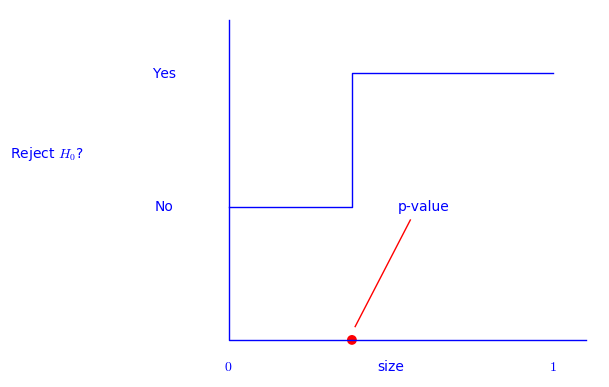

In [182]:
p=text('Reject $H_0$?',(12,12)); p+=text('No',(30,10)); p+=text('Yes',(30,15)); p+=text('p-value',(70,10))
p+=text('size',(65,4)); p+=text('$0$',(40,4)); p+=text('$1$',(90,4)); p+=points((59,5),rgbcolor='red',size=50)
p+=line([(40,17),(40,5),(95,5)]); p+=line([(40,10),(59,10),(59,15),(90,15)]);
p+=line([(68,9.5),(59.5,5.5)],rgbcolor='red'); p.show(axes=False)

### Definition of p-value
Suppose that for every $\alpha \in (0,1)$ we have a $\mathsf{size}$ $\alpha$ test with rejection region $\mathbb{X}_{R,\alpha}$ and test statistic $T$.  Then,
$$
\text{p-value} := \inf \{ \alpha: T(X) \in \mathbb{X}_{R,\alpha} \} \enspace .
$$
That is, the p-value is the smallest $\alpha$ at which a $\mathsf{size}$ $\alpha$ test rejects the null hypothesis.

### Understanding p-value
If the evidence against $H_0$ is strong then the p-value will be small.  However, a large p-value is not strong evidence in favour of $H_0$.  This is because a large p-value can occur for two reasons:

- $H_0$ is true.
- $H_0$ is false but the test has low power (i.e., high Type II error).

Finally, it is important to realise that *p-value is not the probability that the null hypothesis is true*, i.e. $\text{p-value} \, \neq P(H_0|x)$, where $x$ is the data.  The following tabulation of evidence scale is useful.

The scale of the evidence against the null hypothesis $H_0$ in terms of the range of the p-values has the following interpretation that is commonly used:

- P-value $\in (0, 0.01]$: Very strong evidence against $H_0$
- P-value $\in (0.01, 0.05]$: Strong evidence against $H_0$
- P-value $\in (0.05, 0.1]$: Weak evidence against $H_0$
- P-value $\in (0.1, 1]$: Little or no evidence against $H_0$

Next we will see a convenient expression for the p-value for certain tests.

### The p-value of a hypothesis test

Suppose that the $\mathsf{size}$ $\alpha$ test based on the test statistic $T$ and critical value $c_{\alpha}$ is of the form:

$$
\text{Reject $H_0$ if and only if $T:=T((X_1,\ldots,X_n))> c_{\alpha}$,}
$$

then

$$
\boxed{
\text{p-value} \, = \sup_{\theta \in \mathbf{\Theta}_0} P_{\theta}(T((X_1,\ldots,X_n)) \geq t:=T((x_1,\ldots,x_n))) \enspace ,}
$$

where, $(x_1,\ldots,x_n)$ is the observed data and $t$ is the observed value of the test statistic $T$.  

In words, **the p-value is the supreme probability under $H_0$ of observing a value of the test statistic the same as or more extreme than what was actually observed.**


Let us revisit the Orbiter waiting times example from the p-value perspective.

### Example: p-value for the parametric Orbiter bus waiting times experiment

Let the waiting times at our bus-stop be $X_1,X_2,\ldots,X_{132} \overset{IID}{\sim} Exponential(\lambda^*)$.  Consider the following testing problem:

$$
H_0: \lambda^*=\lambda_0=\frac{1}{10} \quad \text{versus} \quad H_1: \lambda^* \neq \lambda_0 \enspace .
$$

We already saw that the Wald test statistic is:

$$
W:=W(X_1,\ldots,X_n)= \frac{\widehat{\Lambda}_n-\lambda_0}{\widehat{\mathsf{se}}_n(\widehat{\Lambda}_n)} = \frac{\frac{1}{\overline{X}_n}-\lambda_0}{\frac{1}{\sqrt{n}\overline{X}_n}} \enspace .
$$

The observed test statistic is:

$$
w=W(x_1,\ldots,x_{132})=
\frac{\frac{1}{\overline{X}_{132}}-\lambda_0}{\frac{1}{\sqrt{132}\overline{X}_{132}}}
= \frac{\frac{1}{9.0758}-\frac{1}{10}}{\frac{1}{\sqrt{132} \times 9.0758}} = 1.0618 \enspace .
$$
Since, $W \overset{d}{\to} Z \sim Normal(0,1)$, the p-value for this Wald test is:

$$
\begin{align}
\text{p-value} \, 
&= \sup_{\lambda \in \mathbf{\Lambda}_0} P_{\lambda} (|W|>|w|)= \sup_{\lambda \in \{\lambda_0\}} P_{\lambda} (|W|>|w|) =  P_{\lambda_0} (|W|>|w|) \\
& \to P (|Z|>|w|)=2 \Phi(-|w|)=2 \Phi(-|1.0618|)=2 \times 0.1442=0.2884 \enspace .
\end{align}
$$

Therefore, there is little or no evidence against $H_0$ that the mean waiting time under an IID $Exponential$ model of inter-arrival times is exactly ten minutes.


## Preparation for Nonparametric Estimation and Testing
### YouTry Later

Python's `random` for sampling and sequence manipulation

The Python `random` module, available in SageMath, provides a useful way of taking samples if you have already generated a 'population' to sample from, or otherwise playing around with the elements in a sequence.  See http://docs.python.org/library/random.html for more details.  Here we will try a few of them.

The aptly-named sample function allows us to take a sample of a specified size from a sequence.  We will use a list as our sequence:

In [90]:
popltn = range(1, 101, 1) # make a population
sample(popltn, 10) # sample 10 elements from it at random

[99, 68, 83, 1, 38, 67, 80, 97, 81, 12]

Each call to sample will select unique elements in the list (note that 'unique' here means that it will not select the element at any particular position in the list more than once, but if there are duplicate elements in the list, such as with a list [1,2,4,2,5,3,1,3], then you may well get any of the repeated elements in your sample more than once).  sample samples with replacement, which means that repeated calls to sample may give you samples with the same elements in.

In [91]:
popltnWithDuplicates = range(1, 11, 1)*4 # make a population with repeated elements
print(popltnWithDuplicates)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [92]:
for i in range (5):
    print sample(popltnWithDuplicates, 10)

[9, 8, 2, 2, 3, 5, 8, 9, 7, 6]
[7, 2, 8, 5, 3, 7, 8, 10, 5, 9]
[7, 4, 10, 2, 5, 10, 4, 5, 10, 3]
[3, 1, 5, 8, 2, 9, 9, 6, 7, 10]
[4, 4, 9, 10, 3, 2, 6, 7, 3, 10]


Try experimenting with choice, which allows you to select one element at random from a sequence, and shuffle, which shuffles the sequence in place (i.e, the ordering of the sequence itself is changed rather than you being given a re-ordered copy of the list).  It is probably easiest to use lists for your sequences.  See how `shuffle` is creating permutations of the list.  You could use `sample` and `shuffle` to emulate *permuations of k objects out of n* ...

You may need to check the documentation to see how use these functions.

In [ ]:
#?sample

In [ ]:
#?shuffle

In [ ]:
#?choice